# 🌊 SWOT Data Notebook

This Colab notebook automatically installs all needed packages, downloads the data, and runs the full analysis.

📦 Required packages will install automatically  
📁 Data will be downloaded via gdown  
⏱️ Just click "Runtime > Run all" to get started!  
❗ The notebook is self-contained until Exercise 5, where login credentials for CMEMS are required.

<a target="_blank" href="https://colab.research.google.com/github/carocamargo/SLSC_SWOT/blob/main/SWOT_Notebook.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# 🧭 Table of Contents

- Set Up
- Data Access
- Exercises
  1. Data Exploration
  2. Region Selection and Quality Flags
  3. Altimetry principles and Corrections
  4. Oceanography from SWOT
  5. Added value of SWOT: Comparison with DUACS L4, Tide gauges and SST




# Local copy
If you are running this notebook on Google Colab, make sure you make a copy so you can change your edits. For this, go to File > Save a Copy > choose where you would like to save (on your own github or drive).

# Set Up
In this exercise we will use the following packages:
* ```numpy``` : deadling with arrays
* ``` pandas```: deadling with dataframes
*``` xarray```: dealing with netcdf
*```matplotlib```: plotting
*```os```: listing files in the path
*```gdown```: accessing google drive file
*```cartopy```: plotting maps
* ```cmocean```: colormaps for oceanography (https://matplotlib.org/cmocean/)
* ```copernicusmarine```: access CMEMS data (https://marine.copernicus.eu/) - requires login information

Most of these packages are already pre-installed in Google collab, except for ```cartopy```,```gdown```, ```cmocean``` and ```copernicusmarine``` which we will install with pip.

Note, you can comment out the installation and loading of ```copernicusmarine``` if you wont run the extra part.


If you are not using Colab, then make sure you have all the necessary packages installed.

In [1]:
## are we using colab (true/false)
USING_COLAB = "google.colab" in str(get_ipython())

##1. Install packages necessary
This may take a minute or two to install the system dependencies and compile cartopy.

Note, colab runs in a clean, isolated virtual environment for every notebook session, so there's no need to set up a virtual environment manually.

In [2]:
if USING_COLAB:
  !pip install -q gdown
  !pip install cartopy
  !pip install cmocean
  !pip install copernicusmarine "xarray[io]" "zarr<3" fsspec  # comment out if not running Extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.9/421.9 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.4/115.4 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.3/211.3 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 82.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.8/206.8 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 102.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 96.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 7.1 MB/s eta 0:00:00
  Created wheel for asciitree: filename=asciitree-0.3.3-py3-none-any.whl size=5031 sha256

## 2. Load libraries

In [3]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

import os
import pandas as pd
import cmocean
import matplotlib.cm as mplcm
import copernicusmarine # comment out if not running Extra
if USING_COLAB:
  import gdown
print("All packages imported successfully!")

All packages imported successfully!


# Accessing SWOT data

I've downloaded some SWOT data locally (see [SWOT_Download.ipynb](https://github.com/carocamargo/SLSC_SWOT/blob/main/SWOT_download.ipynb) for example), and loaded a zip folder into my personal google drive, which I gave access for this exercise.

## Using Colab:
You can access this data with ```gdown```.

When you download and unzip files in Colab (like your .zip with gdown), they are saved in the temporary virtual machine storage (e.g., /content/).

This storage is completely wiped when:

* The Colab session times out (typically after 90 minutes of inactivity),

* The user closes the notebook and returns later,

* The notebook is restarted.

## Local computer
If you are not using Colab, then you can download the data to your local computer(https://drive.google.com/file/d/1js5cvDL8_tqZePIg4hs73Sd2vZxBkJOu/view?usp=drive_link) and unzip it to use it. Don't forget then to change the path to access the data in the cell below.



In [4]:
# if using collab, donwload the data and unzip it
if USING_COLAB:
  data_zipped = 'https://drive.google.com/file/d/1js5cvDL8_tqZePIg4hs73Sd2vZxBkJOu/view?usp=drive_link'
  file_id = data_zipped.split('/')[5]
  gdown.download(f"https://drive.google.com/uc?id={file_id}", quiet=True)
  !unzip SWOT_data.zip

Archive:  SWOT_data.zip
   creating: data/
  inflating: data/SWOT_L3_LR_SSH_Expert_032_236_20250506T102117_20250506T111243_v2.0.1.nc  
  inflating: __MACOSX/data/._SWOT_L3_LR_SSH_Expert_032_236_20250506T102117_20250506T111243_v2.0.1.nc  
  inflating: data/SWOT_L3_LR_SSH_Expert_008_236_20231222T161924_20231222T171050_v2.0.1.nc  
  inflating: __MACOSX/data/._SWOT_L3_LR_SSH_Expert_008_236_20231222T161924_20231222T171050_v2.0.1.nc  
  inflating: data/SWOT_L3_LR_SSH_Expert_004_236_20230930T051905_20230930T061031_v2.0.1.nc  
  inflating: __MACOSX/data/._SWOT_L3_LR_SSH_Expert_004_236_20230930T051905_20230930T061031_v2.0.1.nc  
  inflating: data/SWOT_L3_LR_SSH_Expert_006_236_20231110T224914_20231110T234040_v2.0.1.nc  
  inflating: __MACOSX/data/._SWOT_L3_LR_SSH_Expert_006_236_20231110T224914_20231110T234040_v2.0.1.nc  
  inflating: data/SWOT_L3_LR_SSH_Expert_002_236_20230819T114856_20230819T124022_v2.0.1.nc  
  inflating: __MACOSX/data/._SWOT_L3_LR_SSH_Expert_002_236_20230819T114856_20230819T1

In [5]:
# get file list
if USING_COLAB:
  path = '/content/data/'
else:
  # if not on colab, then change path to the local path where the data is
  path = '/Users/carocamargo/Documents/data/SWOT/SLSC/data/'
  # dont forget to change this to your local one
files = sorted(os.listdir(path))
files

['SWOT_L3_LR_SSH_Expert_001_236_20230729T150350_20230729T155516_v2.0.1.nc',
 'SWOT_L3_LR_SSH_Expert_002_236_20230819T114856_20230819T124022_v2.0.1.nc',
 'SWOT_L3_LR_SSH_Expert_003_236_20230909T083402_20230909T092528_v2.0.1.nc',
 'SWOT_L3_LR_SSH_Expert_004_236_20230930T051905_20230930T061031_v2.0.1.nc',
 'SWOT_L3_LR_SSH_Expert_005_236_20231021T020409_20231021T025535_v2.0.1.nc',
 'SWOT_L3_LR_SSH_Expert_006_236_20231110T224914_20231110T234040_v2.0.1.nc',
 'SWOT_L3_LR_SSH_Expert_007_236_20231201T193420_20231201T202546_v2.0.1.nc',
 'SWOT_L3_LR_SSH_Expert_008_236_20231222T161924_20231222T171050_v2.0.1.nc',
 'SWOT_L3_LR_SSH_Expert_009_236_20240112T130429_20240112T135555_v2.0.1.nc',
 'SWOT_L3_LR_SSH_Expert_010_236_20240202T094935_20240202T104102_v2.0.1.nc',
 'SWOT_L3_LR_SSH_Expert_011_236_20240223T063441_20240223T072607_v2.0.1.nc',
 'SWOT_L3_LR_SSH_Expert_012_236_20240315T031943_20240315T041109_v2.0.1.nc',
 'SWOT_L3_LR_SSH_Expert_013_236_20240405T000447_20240405T005613_v2.0.1.nc',
 'SWOT_L3_LR

Note, if you want to keep the data in your personal drive:

### Step 1: mount your google drive


```
from google.colab import drive
drive.mount('/content/drive')
```

### Step 2: Step 2: Move or copy files to your Drive



```
import shutil

# Save to a persistent folder in your Drive
shutil.copytree('/content/data', '/content/drive/MyDrive/SWOT_data')
```

This copies the unzipped data into your Google Drive at MyDrive/SWOT_data, which **does persist**.





# **Exercises**

The goal of this computer exercise is to get familiar with SWOT L3 Expert ocean data. At the end of this tutorial, you will learn which variables are provided, what are the corrections, how can you plot the data, and how to obtain some oceanographic features of interest.

During the morning lectures you learned about the principles of SWOT and saw some applications. In this tutorial you will get hands-on with SWOT data, learning some basics of how to open the data, how to manipulate it, some basic plots and some applications.

This tutorial uses Python (jupyter notebook) to deal with SWOT. Why?
- Python is open source
- It has several tools that makes it easy to deal with nercdfs (e.g., [xarray](https://docs.xarray.dev/en/stable/))
- The [SWOT Community](https://github.com/SWOT-community) is working mainly on python, making it easier to follow the [examples](https://swot-community.github.io/SWOT-galleries/)
- [AVISO](https://swot-community.github.io/SWOT-galleries/SWOT-Oceanography/ex_aviso_download_swot.html), [CMEMS](https://help.marine.copernicus.eu/en/articles/8287609-copernicus-marine-toolbox-api-open-a-dataset-or-read-a-dataframe-remotely) and [JPL PODAAC](https://podaac.github.io/tutorials/quarto_text/SWOT.html) all have jupyter notebooks and python scripts to directly download data.

That being said, you can you use your favorite programming language, and simply use this tutorial as a basis.

We will work with one swath (pass number 236), which crosses the North Sea, and we will use the science orbit.

## **1. Data exploration.**
Open one cycle only (i.e., only one file), and explore the dataset.



In [6]:
file = files[0]
ds = xr.open_dataset(path+file)
ds

<xarray.Dataset> Size: 99MB
Dimensions:               (num_lines: 9860, num_pixels: 69, num_nadir: 937)
Coordinates:
    latitude              (num_lines, num_pixels) float64 5MB ...
    longitude             (num_lines, num_pixels) float64 5MB ...
Dimensions without coordinates: num_lines, num_pixels, num_nadir
Data variables: (12/21)
    time                  (num_lines) datetime64[ns] 79kB ...
    calibration           (num_lines, num_pixels) float64 5MB ...
    cross_track_distance  (num_pixels) float64 552B ...
    dac                   (num_lines, num_pixels) float64 5MB ...
    internal_tide         (num_lines, num_pixels) float64 5MB ...
    mdt                   (num_lines, num_pixels) float64 5MB ...
    ...                    ...
    ugosa_unfiltered      (num_lines, num_pixels) float64 5MB ...
    vgos_filtered         (num_lines, num_pixels) float64 5MB ...
    vgosa_filtered        (num_lines, num_pixels) float64 5MB ...
    vgosa_unfiltered      (num_lines, num_pixels) float64 5MB ...
    i_num_line            (num_nadir) int16 2kB ...
    i_num_pixel           (num_nadir) int8 937B ...
Attributes: (12/42)
    Conventions:                     CF-1.7
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Swath
    comment:                         Sea Surface Height measured by Altimetry
    data_used:                       SWOT KaRIn L2_LR_SSH PGC0/PIC0/PIC2 (NAS...
    doi:                             https://doi.org/10.24400/527896/A01-2023...
    ...                              ...
    geospatial_lon_min:              6.9e-05
    geospatial_lon_max:              359.999994
    date_modified:                   2025-03-05T02:26:56Z
    history:                         2025-03-05T02:26:56Z: Created by DUACS K...
    date_created:                    2025-03-05T02:26:56Z
    date_issued:                     2025-03-05T02:26:56Z

a.   Which variables does it include?

In [7]:
print(ds.data_vars)

Data variables:
    time                  (num_lines) datetime64[ns] 79kB ...
    calibration           (num_lines, num_pixels) float64 5MB ...
    cross_track_distance  (num_pixels) float64 552B ...
    dac                   (num_lines, num_pixels) float64 5MB ...
    internal_tide         (num_lines, num_pixels) float64 5MB ...
    mdt                   (num_lines, num_pixels) float64 5MB ...
    mss                   (num_lines, num_pixels) float64 5MB ...
    ocean_tide            (num_lines, num_pixels) float64 5MB ...
    quality_flag          (num_lines, num_pixels) uint8 680kB ...
    sigma0                (num_lines, num_pixels) float64 5MB ...
    ssha_filtered         (num_lines, num_pixels) float64 5MB ...
    ssha_unedited         (num_lines, num_pixels) float64 5MB ...
    ssha_unfiltered       (num_lines, num_pixels) float64 5MB ...
    ugos_filtered         (num_lines, num_pixels) float64 5MB ...
    ugosa_filtered        (num_lines, num_pixels) float64 5MB ...
    ugos

b. What are the dimensions of the variables?

In [8]:
print(ds.dims)

FrozenMappingWarningOnValuesAccess({'num_lines': 9860, 'num_pixels': 69, 'num_nadir': 937})


In [9]:
print(ds['i_num_line'].attrs['comment'])

alongtrack indice of the nearest karin pixel from the nadir data


In [10]:

print(ds['i_num_pixel'].attrs['comment'])


acrosstrack indice of the nearest karin pixel from the nadir data


Most of the variables have ```num_lines``` and ```num_pixels``` as dimensions, which represent the **along-track** and the **across-track** indices, respectively.

c. What is the difference between the sea-surface height anomalies provided?

In [11]:
for var in ['ssha_unedited','ssha_unfiltered','ssha_filtered']:
    print(ds[var].attrs['long_name'])
    print(ds[var].attrs['comment'])

sea surface height anomaly calibrated
Height of the sea surface anomaly with all corrections applied and with calibration. Contains both valid and  invalid measurements; see the product user manual for details.

sea surface height anomaly calibrated and edited
Height of the sea surface anomaly with all corrections applied and with calibration and data selection applied; It is equivalent to the Sea Level Anomaly (SLA) distribued in the nadir DUACS products; see the product user manual for details.

sea surface height anomaly calibrated, edited and filtered
Height of the sea surface anomaly with all corrections applied and with calibration, data selection and noise reduction (using Unet model) applied; see the product user manual for details.



d. Plot the mean sea surface for the entire pass. Which areas does it cross?

/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


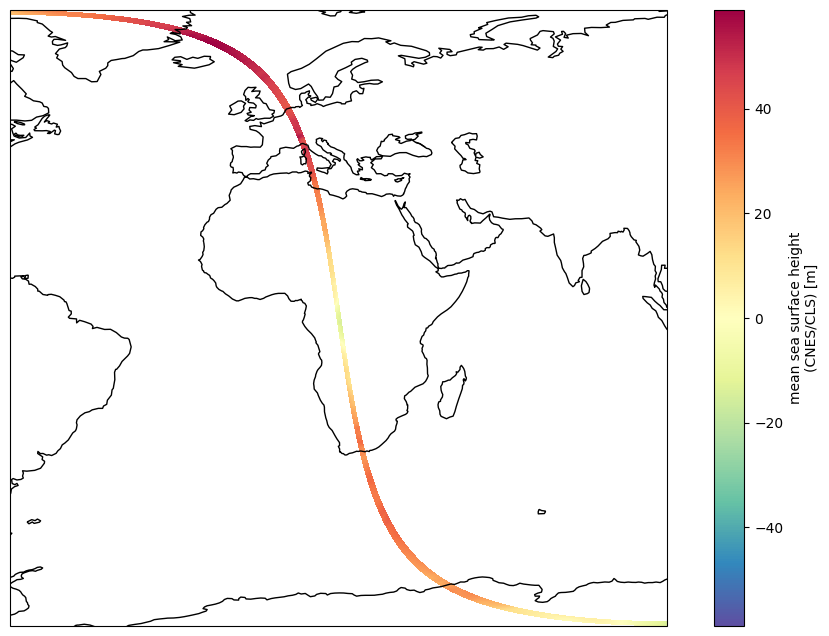

In [12]:
fig, ax = plt.subplots( figsize=(12, 8),
                               subplot_kw=dict(projection=ccrs.PlateCarree()))
ds['mss'].plot.pcolormesh(
            ax=ax,
     x="longitude",
        y="latitude",
        cmap="Spectral_r",
#         vmin=-0.25,
#         vmax=0.25,
)
ax.coastlines()
# ax.set_extent([-8, 12, 48, 62])
plt.show()

e. How long does the cycle take to complete?

In [13]:
print(f'Pass from {np.array(ds.time[0])} to {np.array(ds.time[-1])}')

print(f'Pass takes {np.array(ds.time[-1]-ds.time[0])/np.timedelta64(1, "h")}h to complete')

Pass from 2023-07-29T15:03:50.866000000 to 2023-07-29T15:55:16.991396992
Pass takes 0.85725705472h to complete


e.	When will this pass be repeated again (i.e., when is the next cycle)?

In [14]:
ds2 = xr.open_dataset(path+files[1])

print(f'Pass will repeat again in  {np.array(ds2.time[0]-ds.time[0])/np.timedelta64(1, "D")}days')


Pass will repeat again in  20.864647847222223days


##**2.  Region Selection and Quality Flags.**

Select only the North sea (lon -12 to 12, lat from 48 to 62 degrees north).

In [15]:
# define our bounding box
lon_range = -12, 12
lat_range = 48, 62
localbox = [lon_range[0], lon_range[1], lat_range[0], lat_range[1]]

In [16]:
def _normalized_ds(ds, lon_min, lon_max):
    lon = ds.longitude.values
    lon[lon < lon_min] += 360
    lon[lon > lon_max] -= 360
    ds.longitude.values = lon
    return ds

def subset_ds(ds, lon_range, lat_range,variables=False):
    # adapted from
    # https://swot-community.github.io/SWOT-galleries/SWOT-Oceanography/ex_swot_l3_unsmoothed.html
    swot_ds = ds.copy()
    if variables:
      swot_ds = swot_ds[variables]
    swot_ds.load()

    ds = _normalized_ds(swot_ds.copy(), -180, 180)

    mask = (
        (ds.longitude <= lon_range[1])
        & (ds.longitude >= lon_range[0])
        & (ds.latitude <= lat_range[1])
        & (ds.latitude >= lat_range[0])
    ).compute()

    # if we didnt convert our longitude
    # Build mask to cover the two parts
    # mask = (
    #     ((ds.longitude >= lon_range[0]) | (ds.longitude <= lon_range[1]))  # notice the OR
    #     & (ds.latitude >= lat_range[0])
    #     & (ds.latitude <= lat_range[1])
    # ).compute()

    swot_ds_area = swot_ds.where(mask, drop=True)

    if swot_ds_area.sizes['num_lines'] == 0:
        print(f'Dataset {file} not matching geographical area.')
        return None

    for var in list(swot_ds_area.keys()):
        swot_ds_area[var].encoding = {'zlib':True, 'complevel':5}

    return swot_ds_area


In [17]:
da = subset_ds(ds, lon_range, lat_range)

a. Plot the ssha (unedited)

/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


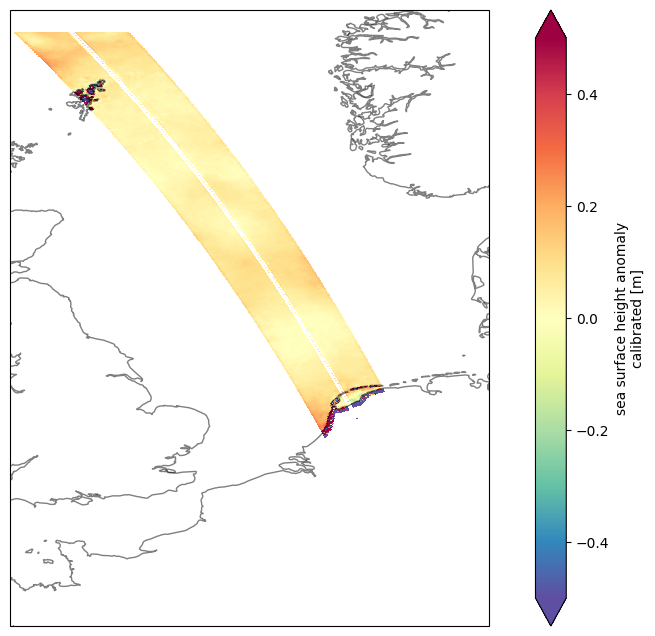

In [18]:
fig, ax = plt.subplots( figsize=(12, 8),
                               subplot_kw=dict(projection=ccrs.PlateCarree()))
da['ssha_unedited'].plot.pcolormesh(
        ax=ax,
 x="longitude",
    y="latitude",
        cmap="Spectral_r",
        vmin=-0.5,
        vmax=0.5,
)
ax.coastlines(alpha=0.5)

# ax.set_extent([-12, 12, 48, 62])
plt.show()

b.	Look at the quality_flag variable. Which values do we have flagged? Can we trust the data in the Wadden Sea?

In [19]:
ds['quality_flag']

<xarray.DataArray 'quality_flag' (num_lines: 9860, num_pixels: 69)> Size: 680kB
[680340 values with dtype=uint8]
Coordinates:
    latitude   (num_lines, num_pixels) float64 5MB 78.27 78.25 ... -78.25 -78.27
    longitude  (num_lines, num_pixels) float64 5MB -65.48 -65.48 ... 101.4 101.4
Dimensions without coordinates: num_lines, num_pixels
Attributes:
    comment:        Deduced from L3 DUACS processing; see the product user ma...
    credits:        LEGOS is the author of the sea ice classification algorit...
    flag_masks:     [  0   3   5  10  18  19  20  30  50  70 100 101 102]
    flag_meanings:  good eclipse local_outliers bad_quality_coast ocean_unsur...
    long_name:      Quality Flag
    standard_name:  valid_flag_for_data

In [20]:
# make dictonary with flag values and meanings
flag_dict = dict(zip(ds['quality_flag'].attrs['flag_masks'],
                     ds['quality_flag'].attrs['flag_meanings'].split()
                    ))

# get the flags we actually have in the data only
actual_flags = np.unique(da['quality_flag'])
actual_flags = actual_flags[np.isfinite(actual_flags)]

# make a dictionary with them only,
flags = {flag:flag_dict[flag] for i,flag in enumerate(actual_flags)}
flag_labels = [flag_dict[flag] for i,flag in enumerate(actual_flags)]

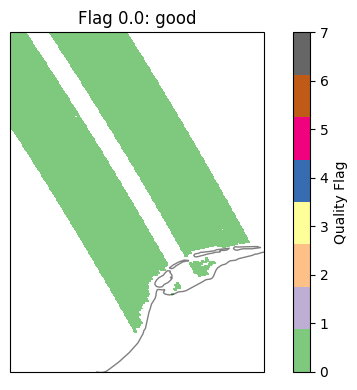

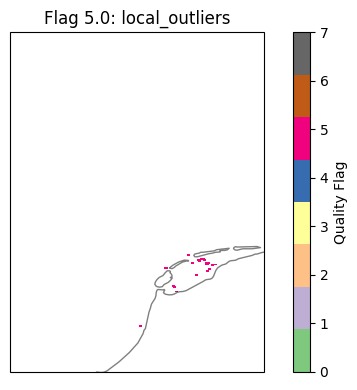

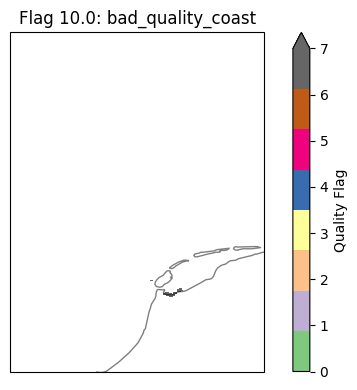

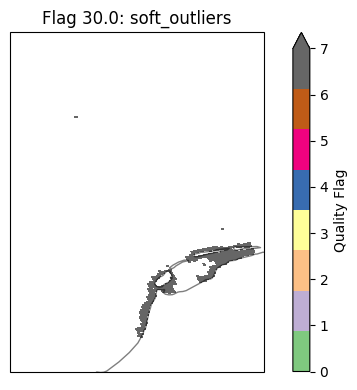

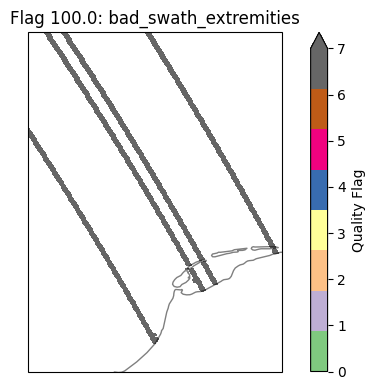

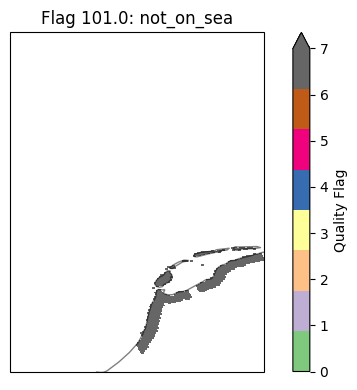

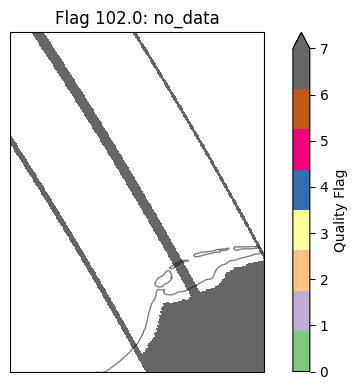

In [21]:
localbox_zoom2 = [3,6,52,56]
for flag in actual_flags:
    fig, ax = plt.subplots( figsize=(6, 4),
                               subplot_kw=dict(projection=ccrs.PlateCarree()))
    da.where(da['quality_flag']==flag)['quality_flag'].plot.pcolormesh(

            ax=ax,
     x="longitude",
        y="latitude",
        cmap='Accent',
        vmin=0,
        vmax=7,
    )
    ax.coastlines(alpha=0.5)
    plt.title('Flag {}: {}'.format(flag,flags[flag]))
    ax.set_extent(localbox_zoom2)
    plt.tight_layout()
    plt.show()

In [22]:
from matplotlib.colors import ListedColormap

In [23]:
# make a dictionary with them only, change the number for convenience
flags = {i:flag_dict[flag] for i,flag in enumerate(actual_flags)}

# change number of flags to indices
z = np.array(da['quality_flag'])
for i,flag in enumerate(actual_flags):
    z[z==flag] = i
x=np.array(da.longitude)
y=np.array(da.latitude)

# Get original Accent colormap with 8 colors
original_colors = plt.cm.Accent.colors  # returns a tuple of 8 RGBA tuples

# Remove one (e.g., the last one)
new_colors = original_colors[:7]  # or use any slicing/indexing

# Create new colormap
cmap = ListedColormap(new_colors)

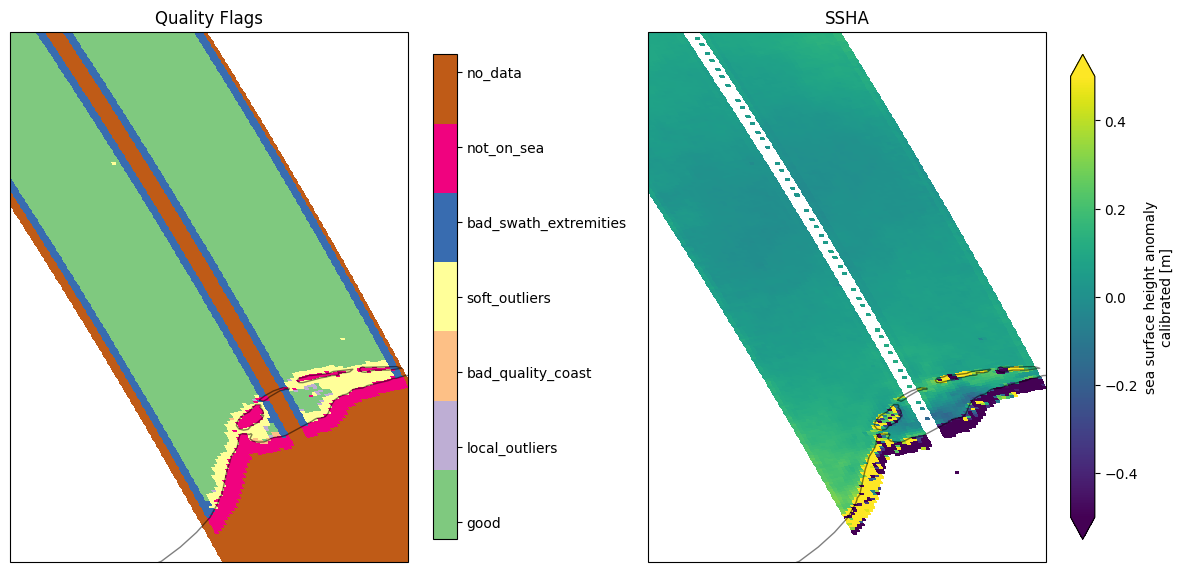

In [24]:
localbox_zoom2 = [3,6,52,56]

fig, (ax,ax2) = plt.subplots( 1,2,figsize=(12,10),
                               subplot_kw=dict(projection=ccrs.PlateCarree()))
mesh = ax.pcolormesh(x,y,z,
                    transform = ccrs.PlateCarree(),
                            cmap=cmap,
                     vmin=0,vmax=7,
                    )
ax.coastlines(alpha=0.5)
ax.set_title('Quality Flags')
ax.set_extent(localbox_zoom2)
cbar = plt.colorbar(mesh, ax=ax,
                    shrink=0.5,
                    ticks=np.linspace(0.25,len(flags)-0.25,len(flags)),
                    spacing='proportional'
                   )
cbar.ax.set_yticklabels(flag_labels)

da['ssha_unedited'].plot(
    alpha=1,ax=ax2,
     x="longitude",
    y="latitude",
    cbar_kwargs={"shrink": 0.5},
    vmin=-0.5,vmax=0.5)
ax2.set_title('SSHA')
ax2.coastlines(alpha=0.5)
ax2.set_extent(localbox_zoom2)
plt.tight_layout()

plt.show()

## **3. Altimetry principles and corrections**


The surface topography is determined by radar altimeters by measuring the travel time of an emitted radar pulse from the satellite to the surface of the ocean (very simplistic explanation).

The echo of the radar is known as a waveform. From the waveform, we can deduce several parameters, such as the radar range (used to estimate the surface topography), the backscatter coefficient (which informs us about the roughness of the surface), the significant wave height (estimated from the slope of the waveform) and wind speed (derived from the backscatter coefficient and the SWH).

By knowing the altitude of the satellite and having the travel time, it is possible then to determine the surface topography:

**Surface topography = satellite altitude – (altimeter range + geophysical corrections)**

A set of corrections needs to be applied to altimeter range. We won’t go into all of them, because several are applied at lower processing levels. For example, instrument corrections are applied at the raw data. Some of the main corrections are:
- Corrections for perturbations of the radar wave as it crosses the atmosphere;
- Correction for how the sea state directly affects the radar wave (sea state bias, or electromagnetic bias)
- Tidal corrections (ocean tides (barotropic and internal ones), solid earth, pole tides and loading effects)
- Corrections for how the ocean responds to the atmosphere.

Uncorrected data are available in the Level 2 data products. In the Level 3 data that we are using, these corrections have already been applied. A few of them are provided along with the SSHA for users that may want to reverse the correction and recalculate the corrected SSHA with their own “favorite” version. These are dynamic atmospheric correction (DAC), internal tide and ocean tide.

More general SWOT information can be found on the [DUACS SWOT L3 User handbook](https://www.aviso.altimetry.fr/fileadmin/documents/data/tools/hdbk_duacs_SWOT_L3.pdf).

For more information about altimetry principles:
- [AVISO techniques](https://www.aviso.altimetry.fr/en/techniques/altimetry/principle/pulses-and-waveforms.html#:~:text=Analyses%20from%20waveforms%20over%20heterogeneous,on%20flat%20surfaces%20or%20wetlands)
- [Sentinel Wiki Altimetry processing](https://sentiwiki.copernicus.eu/web/altimetry-processing)
- [Sentinel Wiki Altimetry instruments](https://sentiwiki.copernicus.eu/web/s3-altimetry-instruments#S3-Altimetry-Instrument-Backgrounds)

For more information about altimetry corrections:
- [Coastal altimetry workshop presentation by Marcello Passaro and Paolo Cipollini](https://altimetry.esa.int/caw10/old.esaconferencebureau.com/docs/default-source/17c07-img/5-overview-of-altimetry-corrections5eee.pdf?sfvrsn=2)
- [AVISO corrections](https://www.aviso.altimetry.fr/index.php?id=5159)



a. Look at each of these corrections (dac, internal tide and ocean tide). What do they mean? Plot each of them.

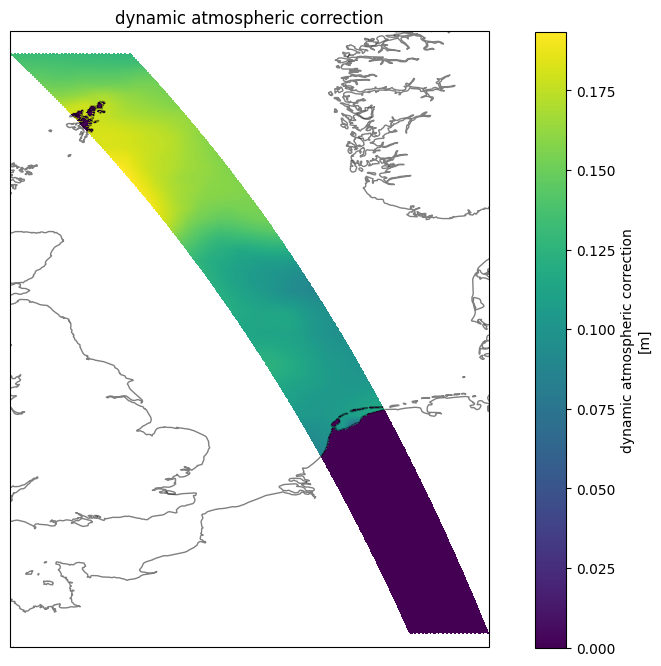

dynamic atmospheric correction
Model estimate of the effect on sea surface topography due to high frequency air pressure and wind effects and the low-frequency height from inverted barometer effect. The ssha in this file is already corrected for the dac; the uncorrected ssha can be computed as follows: [uncorrected ssha]=[ssha from product]+[dac]; see the product user manual for details.



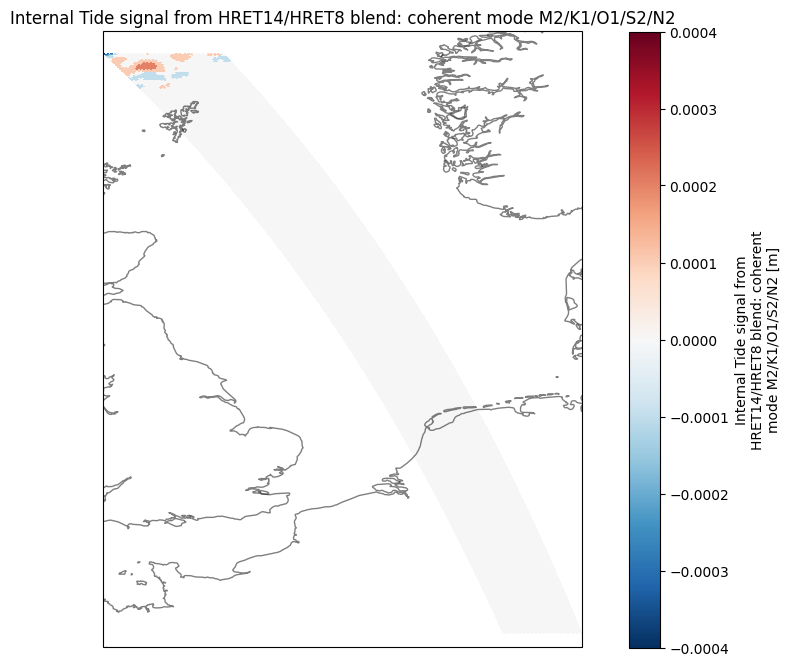

Internal Tide signal from HRET14/HRET8 blend: coherent mode M2/K1/O1/S2/N2
The ssha in this file is already corrected for the internal_tide; the uncorrected ssha can be computed as follows: [uncorrected ssha]= [ssha from product]+[internal_tide]; We recommend to apply on ssha_unfiltered field. See the product user manual for details



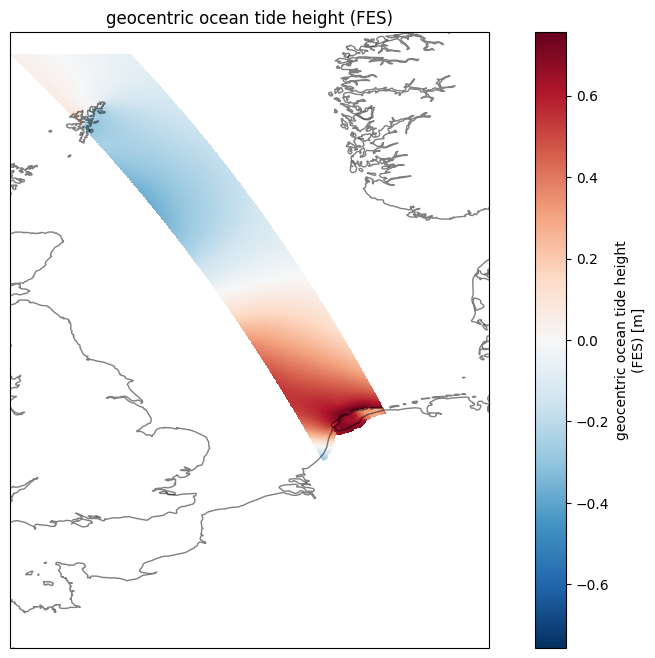

geocentric ocean tide height (FES)
Geocentric ocean tide height. Includes the total sum of the ocean tide, the corresponding load tide and equilibrium long-period ocean tide height. The ssha in this file is already corrected for the ocean_tide; the uncorrected ssha can be computed as follows: [uncorrected ssha]=[ssha from product]+[ocean_tide]; see the product user manual for details.



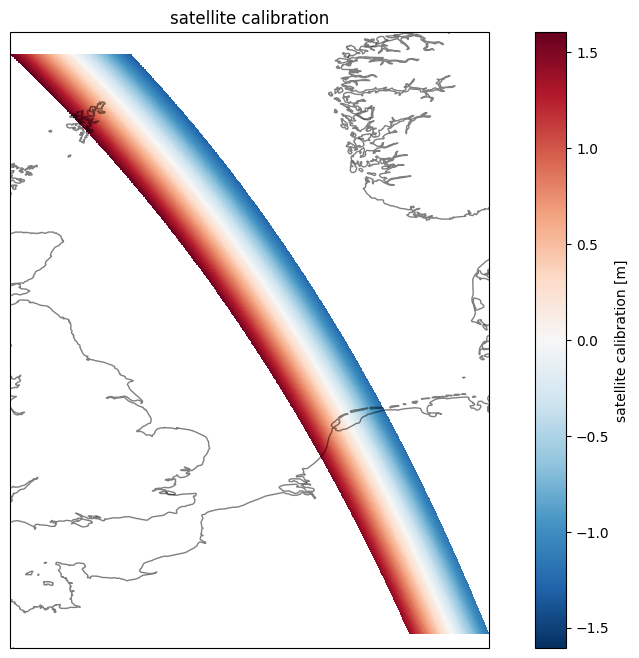

satellite calibration
phase screen + phase_screen_static + phase_screen_orbit + xcal. the uncorrected ssha can be computed as follows: [uncorrected ssha]=[ssha from product] - [calibration]; see the product user manual for details.



In [25]:
for correction in ['dac',
                   'internal_tide',
                   'ocean_tide',
                   'calibration']:
    fig, ax = plt.subplots( figsize=(12, 8),
                               subplot_kw=dict(projection=ccrs.PlateCarree()))
    da[correction].plot.pcolormesh(
            ax=ax,
     x="longitude",
        y="latitude",
#         cmap="Spectral_r",
#         vmin=0,
#         vmax=12,
    )
    ax.coastlines(alpha=0.5)
    plt.title(da[correction].attrs['long_name'])
    # ax.set_extent([-12, 12, 48, 62])
    plt.show()
    print(da[correction].attrs['long_name'])
    print(da[correction].attrs['comment'])
    plt.show()

b. Compute the uncorrected SSHA and plot it. How different is it?

In [26]:
da['ssha_uncorrected'] = da['ssha_unedited'] - da['dac'] - da['internal_tide'] - da['ocean_tide']#  - da['calibration']
da['ssha_uncorrected'].attrs={'units':'m',
                              'long_name':'Uncorrected SSHA'}

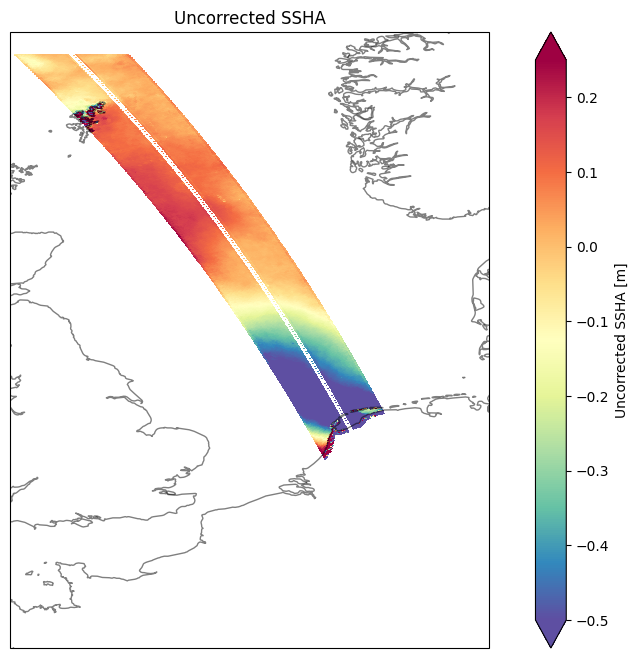

In [27]:
fig, ax = plt.subplots( figsize=(12, 8),
                               subplot_kw=dict(projection=ccrs.PlateCarree()))
da['ssha_uncorrected'].plot.pcolormesh(
        ax=ax,
  x="longitude",
    y="latitude",
        cmap="Spectral_r",
        vmin=-0.5,
        vmax=0.25,
)
ax.coastlines(alpha=0.5)
plt.title('Uncorrected SSHA')
# ax.set_extent([-12, 12, 48, 62])
plt.show()

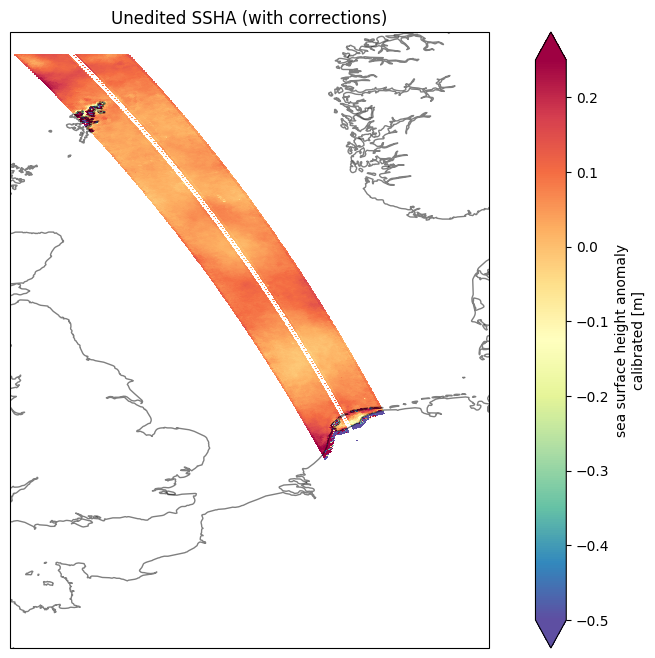

In [28]:
fig, ax = plt.subplots( figsize=(12, 8),
                               subplot_kw=dict(projection=ccrs.PlateCarree()))
da['ssha_unedited'].plot.pcolormesh(
        ax=ax,
  x="longitude",
    y="latitude",
        cmap="Spectral_r",
        vmin=-0.5,
        vmax=0.25,
)
ax.coastlines(alpha=0.5)
plt.title('Unedited SSHA (with corrections)')
# ax.set_extent([-12, 12, 48, 62])
plt.show()

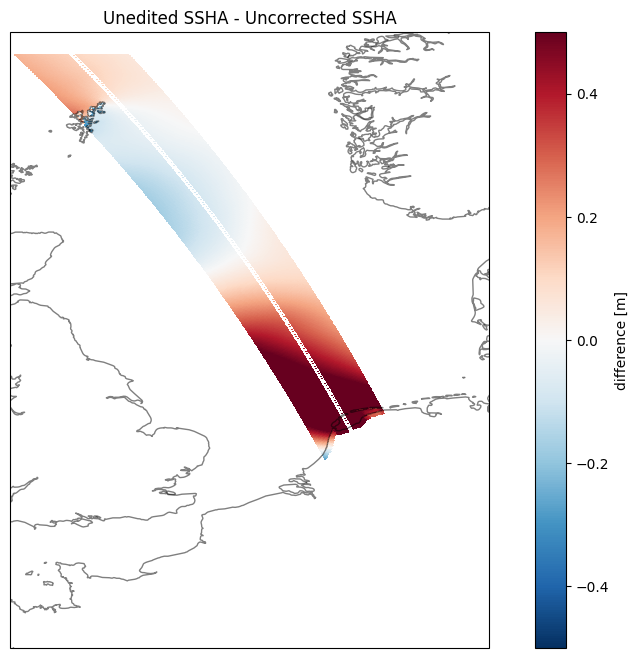

In [29]:

fig, ax = plt.subplots( figsize=(12, 8),
                               subplot_kw=dict(projection=ccrs.PlateCarree()))

cs = ax.pcolormesh(da['longitude'],da['latitude'],
              da['ssha_unedited']-da['ssha_uncorrected'],
              cmap='RdBu_r',
              vmin=-0.5,vmax=0.5)
ax.coastlines(alpha=0.5)
plt.colorbar(cs,label='difference [m]')
plt.title('Unedited SSHA - Uncorrected SSHA')
# ax.set_extent([-12, 12, 48, 62])
plt.show()

c. Look at the *sigma0* variable. What does it mean?

In [30]:

print(ds['sigma0'])

<xarray.DataArray 'sigma0' (num_lines: 9860, num_pixels: 69)> Size: 5MB
[680340 values with dtype=float64]
Coordinates:
    latitude   (num_lines, num_pixels) float64 5MB 78.27 78.25 ... -78.25 -78.27
    longitude  (num_lines, num_pixels) float64 5MB -65.48 -65.48 ... 101.4 101.4
Dimensions without coordinates: num_lines, num_pixels
Attributes:
    comment:        Normalized radar cross section (sigma0) from KaRIn in rea...
    long_name:      normalized radar cross section (sigma0) from KaRIn)
    standard_name:  surface_backwards_scattering_coefficient_of_radar_wave
    units:          1
    valid_max:      10000000
    valid_min:      -1000


d. Which features can you see from sigma0?

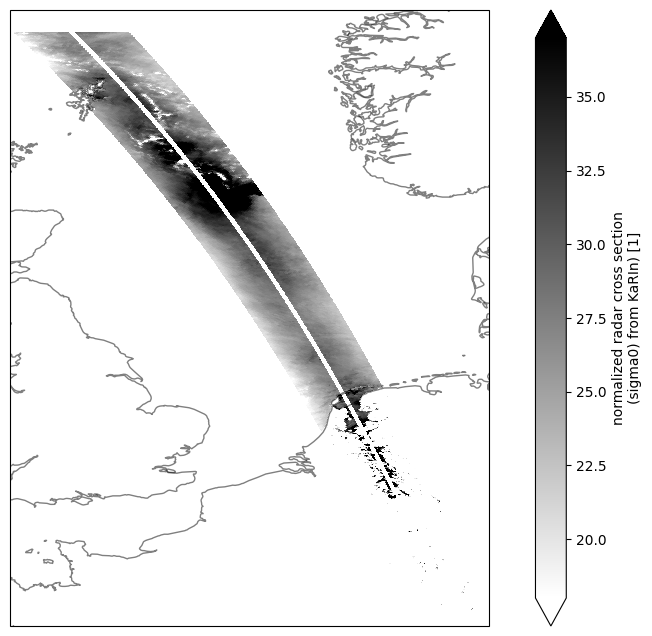

In [31]:
fig, ax = plt.subplots( figsize=(12, 8),
                               subplot_kw=dict(projection=ccrs.PlateCarree()))
da['sigma0'].plot.pcolormesh(
        ax=ax,
    x="longitude",
    y="latitude",
    cmap="gray_r",
    vmin=18,
    vmax=37,
)
ax.coastlines(alpha=0.5)
# plt.title('Unedited SSHA (with corrections)')
# ax.set_extent([-12, 12, 48, 62])
plt.show()

e. Apply quality flags to the sigma0 and compare to the calibrated, edited, and filtered SSHA using subplots.

In [32]:
# Apply quality flag
ds["sigma0"] = ds.sigma0.where(ds.quality_flag==0)
# Apply log 10
ds["sigma0_log"] = 10*np.log10(ds["sigma0"])

In [33]:
# define our bounding box
lon_range = -12+360, 12
lat_range = 48, 62
localbox = [lon_range[0], lon_range[1], lat_range[0], lat_range[1]]

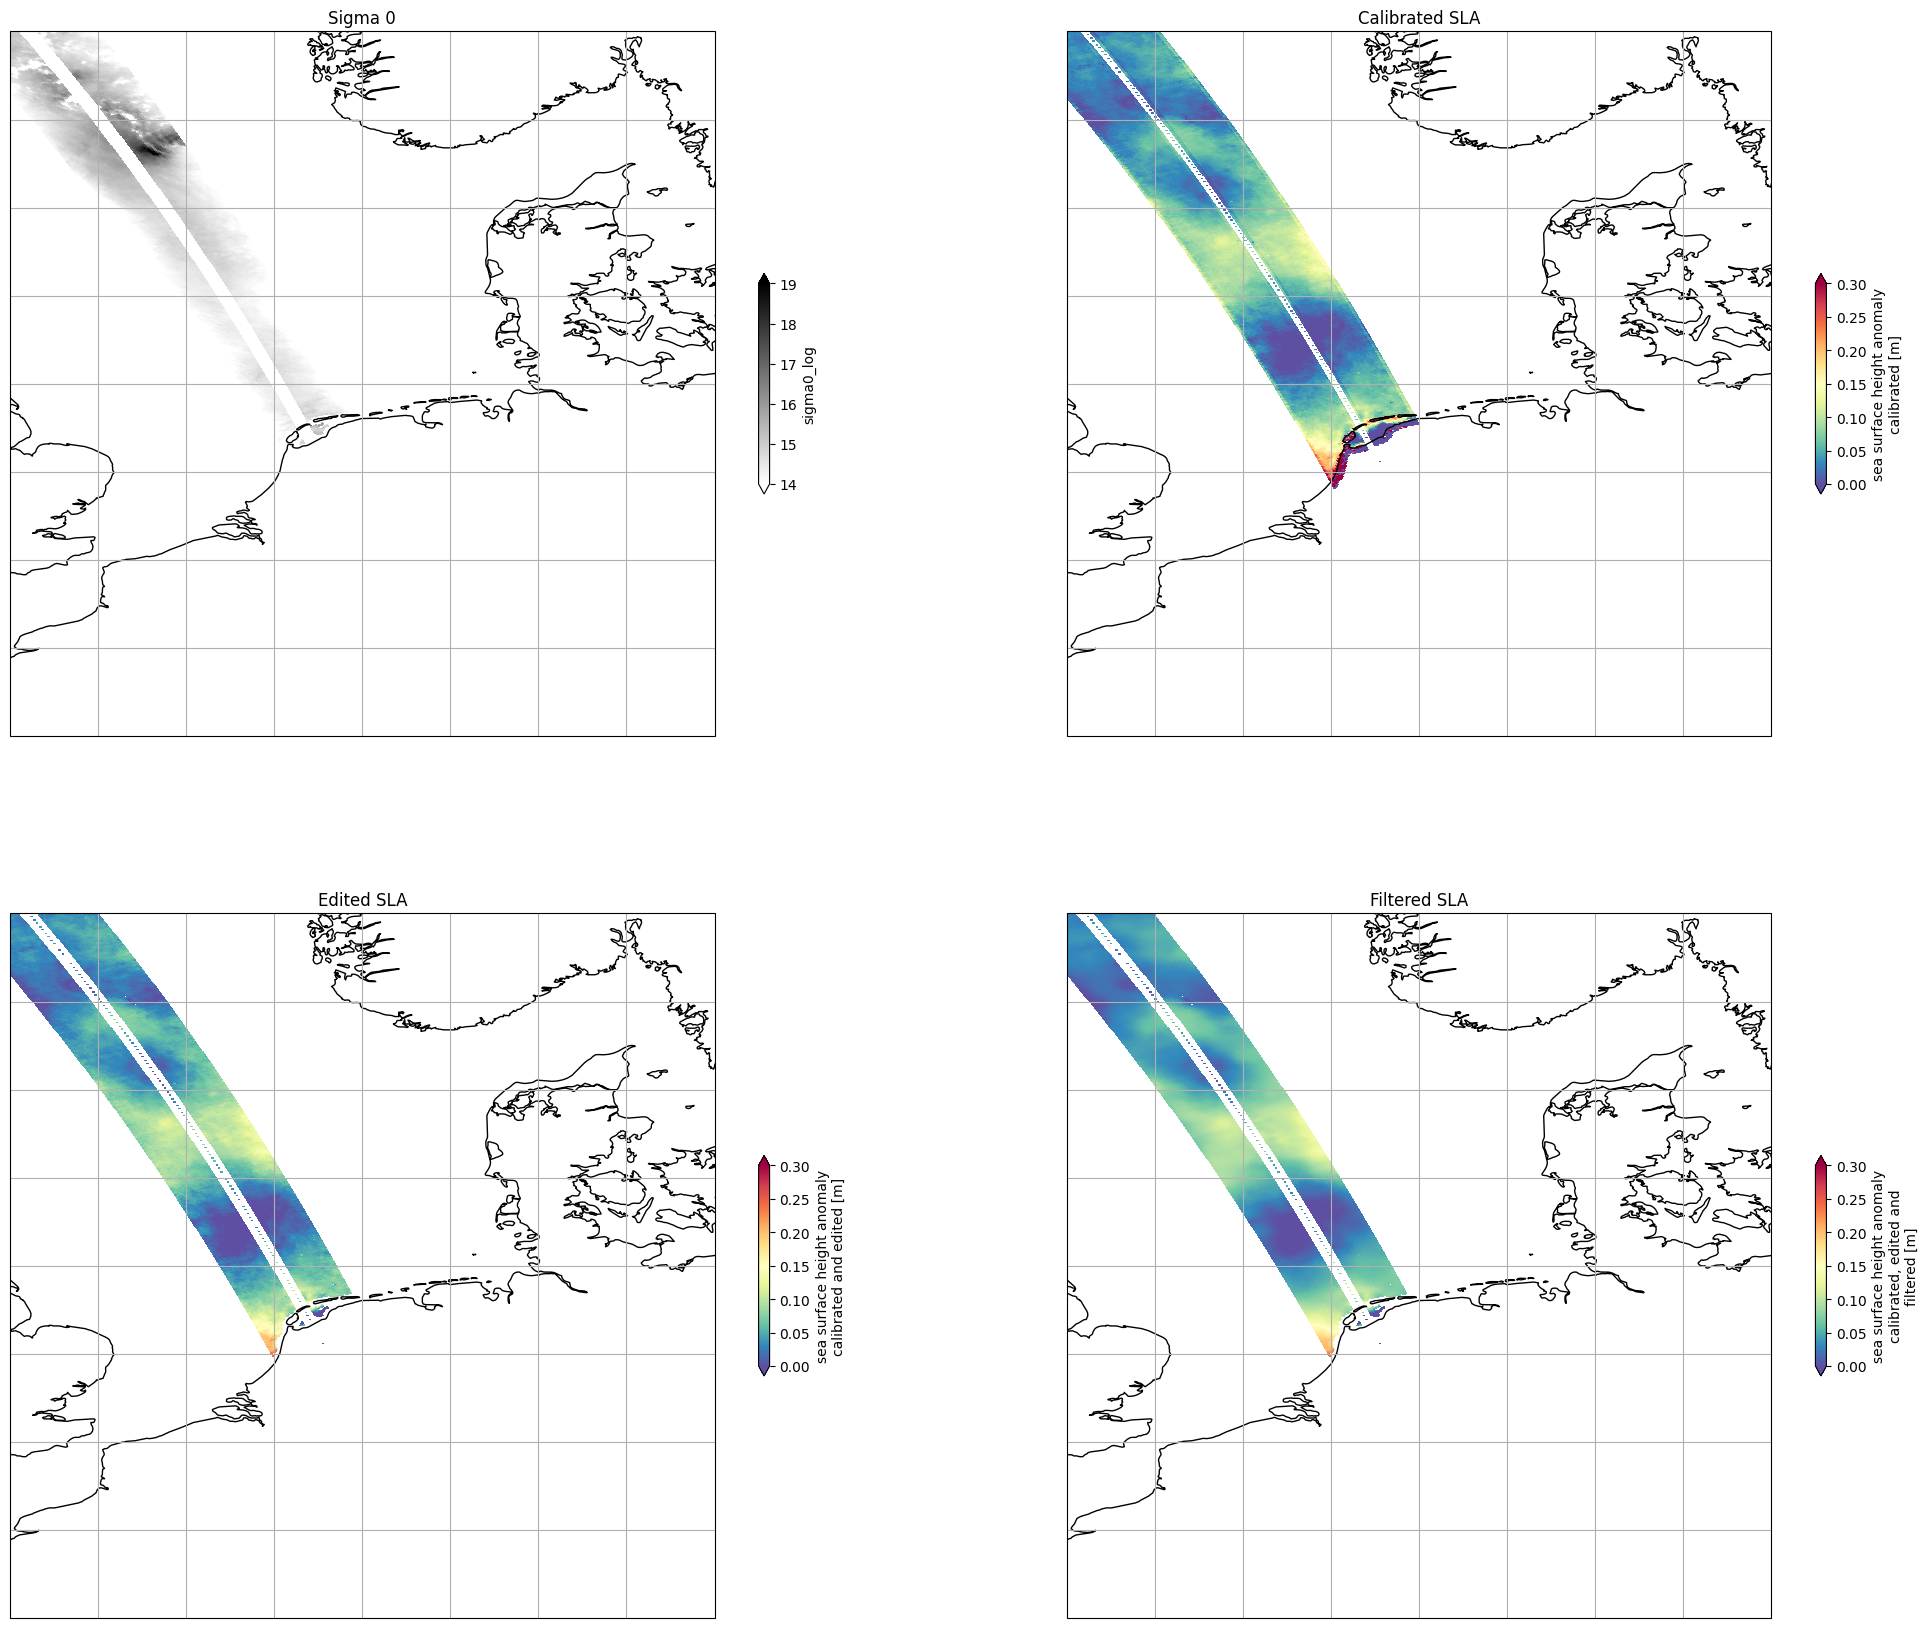

In [34]:
localbox_zoom = [0, 12, 48, 60]

# set figure
fig, axes = plt.subplots(2,2, figsize=(25, 21),
                                         subplot_kw=dict(projection=ccrs.PlateCarree()))

(ax1, ax2), (ax3, ax4) = axes

plot_kwargs = dict(
    x="longitude",
    y="latitude",
    cmap="Spectral_r",
    vmin=0,
    vmax=0.3,
    cbar_kwargs={"shrink": 0.3}
)
plot_kwargs2 = dict(
    x="longitude",
    y="latitude",
    cmap="gray_r",
    vmin=14,
    vmax=19,
    cbar_kwargs={"shrink": 0.3}
)

ds.sigma0_log.plot.pcolormesh(ax=ax1, **plot_kwargs2)
ax1.set_title("Sigma 0")

ds.ssha_unedited.plot.pcolormesh(ax=ax2, **plot_kwargs)
ax2.set_title("Calibrated SLA")

ds.ssha_unfiltered.plot.pcolormesh(ax=ax3, **plot_kwargs)
ax3.set_title("Edited SLA")

ds.ssha_filtered.plot.pcolormesh(ax=ax4, **plot_kwargs)
ax4.set_title("Filtered SLA")

for ax in [ax1, ax2, ax3, ax4]:
    ax.set_extent(localbox_zoom)
    ax.coastlines()
    ax.gridlines()

## **4. Oceanography from SWOT**
This problem was designed by Bjarke Nilsson and Ole Anderson.

The ocean topography can tell us a lot about the ocean surface. Here we will see how SWOT observes some of these features.

The feature oceanographers are most often interested in is the sea surface height anomaly (SSHA), as it reveals many dynamic features of the ocean surface. The SSHA is defined as the difference between the sea surface height (SSH) measurement and the mean sea surface (MSS):

        SSHA = SSH - MSS             (1)

However, some features, such as seamounts, do not appear in the SSHA, but are clearly observed in the full sea surface heights (SSH). In order to save space, the only height measurement provided in the datafile is SSHA. But since the MSS is also provided, one can easily compute the SSH.

Another feature of interest for oceanographers are geostrophic currents. Geostrophic currents are an oceanographic feature directly linked to the ocean topography, as described by the equations for geostrophic currents eastward (u) and northward (v):

      u = -(g/f) * ∂ADT/∂y     and     v =  (g/f) * ∂ADT/∂x     (2)

where:

- g is gravity (can be set as 9.82 m/s²),
- f is the Coriolis parameter,
- ADT is the Absolute Dynamic Topography.

One of the unique things with SWOT is the ability to get two-dimensional observations, allowing us to compute the gradient in both directions from a single pass. With conventional altimetry, you would need several individual passes and compute those gradients at crossover points! This allows us to compute features such as geostrophic currents.

Other features of interest for geodesists, such as gravity disturbances caused by seamounts, are often better visualized by the sea surface slopes (SSS) instead of the sea surface heights (SSH):

      ξ = ∂SSH/∂y,     η = ∂SSH/∂x     (3)
as there is a direct relationship between those features.

The Coriolis parameter is given by:

      f = 2 * Ω * sin(φ)     (4)
where:

- Ω is the rotation rate of the Earth (7.292 × 10⁻⁵ s⁻¹),
- φ is the latitude in radians.

The geostrophic currents arise because the ocean is not at rest at an equipotential surface (the geoid), which is why it depends on the Absolute Dynamic Topography (ADT), defined as the sea surface height above the geoid:

      ADT = SSH - N     (5)
The difference between the MSS and the geoid is the Mean Dynamic Topography (MDT):

      MDT = MSS - N     (6)


a. Compute the SSH and ADT from the variables in the file. Plot them.

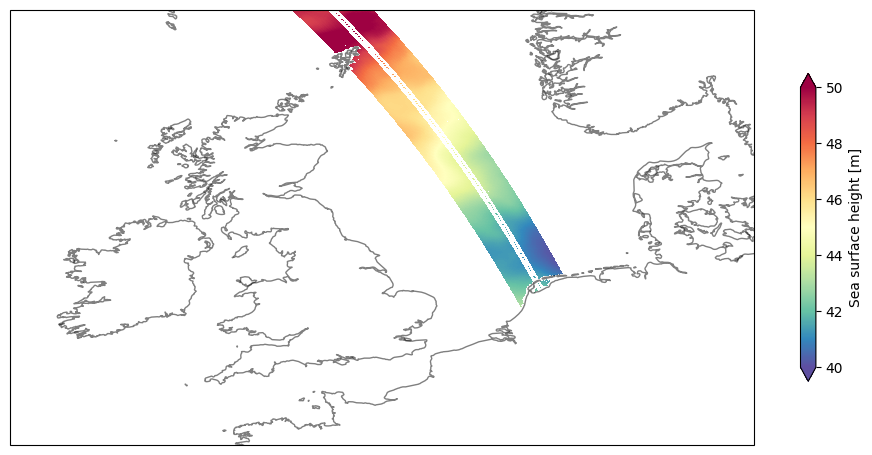

In [53]:
ds['ssh'] = ds['mss'] + ds['ssha_unfiltered']
da['ssh'] = da['mss'] + da['ssha_unfiltered']
da['ssh'].attrs = {'units':'m',
                   'long_name':'Sea surface height'}
ds['ssh'].attrs=da['ssh'].attrs
fig, ax = plt.subplots( figsize=(12, 8),
                               subplot_kw=dict(projection=ccrs.PlateCarree()))
ds['ssh'].plot.pcolormesh(
        ax=ax,
    x="longitude",
    y="latitude",
    cmap="Spectral_r",
    vmin=40,
    vmax=50,
    cbar_kwargs={"shrink": 0.5},
)
ax.coastlines(alpha=0.5)
# plt.title('Unedited SSHA (with corrections)')
ax.set_extent(localbox)
plt.show()

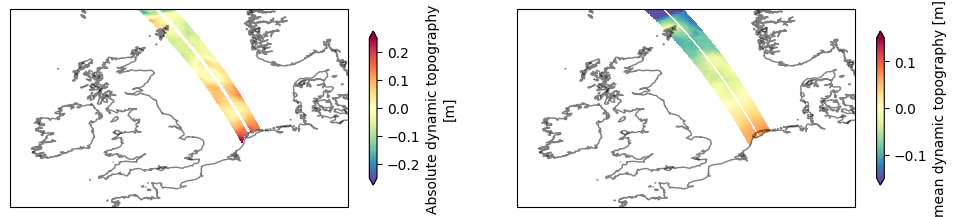

In [54]:
ds['adt'] = ds['ssha_filtered'] + ds['mdt']
da['adt'] = da['ssha_filtered'] + da['mdt']
da['adt'].attrs = {'units':'m',
                   'long_name':'Absolute dynamic topography'}
ds['adt'].attrs=da['adt'].attrs
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12, 8),
                               subplot_kw=dict(projection=ccrs.PlateCarree()))
ds['adt'].plot.pcolormesh(
        ax=ax1,
    x="longitude",
    y="latitude",
    cmap="Spectral_r",
    vmin=-0.25,
    vmax=0.25,
    cbar_kwargs={"shrink": 0.25},
)
ax1.coastlines(alpha=0.5)
# plt.title('Unedited SSHA (with corrections)')
ax1.set_extent(localbox)

ds['mdt'].plot.pcolormesh(
        ax=ax2,
    x="longitude",
    y="latitude",
    cmap="Spectral_r",
    vmin=-0.15,
    vmax=0.15,
    cbar_kwargs={"shrink": 0.25},
)
ax2.coastlines(alpha=0.5)
# plt.title('Unedited SSHA (with corrections)')
ax2.set_extent(localbox)
plt.show()

b. Based on SSH, compute the slopes at each gridpoint.

*Note, to do still here:*
- add projections to plots.
- change colormap to a perceptual one (not rainbow)

In [57]:
ssh = np.array(da.ssh)
# ssh[np.isnan(ssh)]=0
lon = np.array(da.longitude)
lat = np.array(da.latitude)
# We use the built-in python function np.gradient to compute the slopes, but this can be done in other ways
# numpy operates in a columnwise order, which means the first output is always going to be the along-track direction
slope_alongtrack, slope_crosstrack = np.gradient(ssh)
# Beware of the units!
# We divide by 2 to compensate for the 2 km spacing in SWOT.
# This yields a slope with the unit of (m/km)
slope_alongtrack = slope_alongtrack / 2
slope_crosstrack = slope_crosstrack / 2
# We compute the magnitude of the slope as well
slope_magnitude = np.sqrt((slope_alongtrack)**2 + (slope_crosstrack)**2)

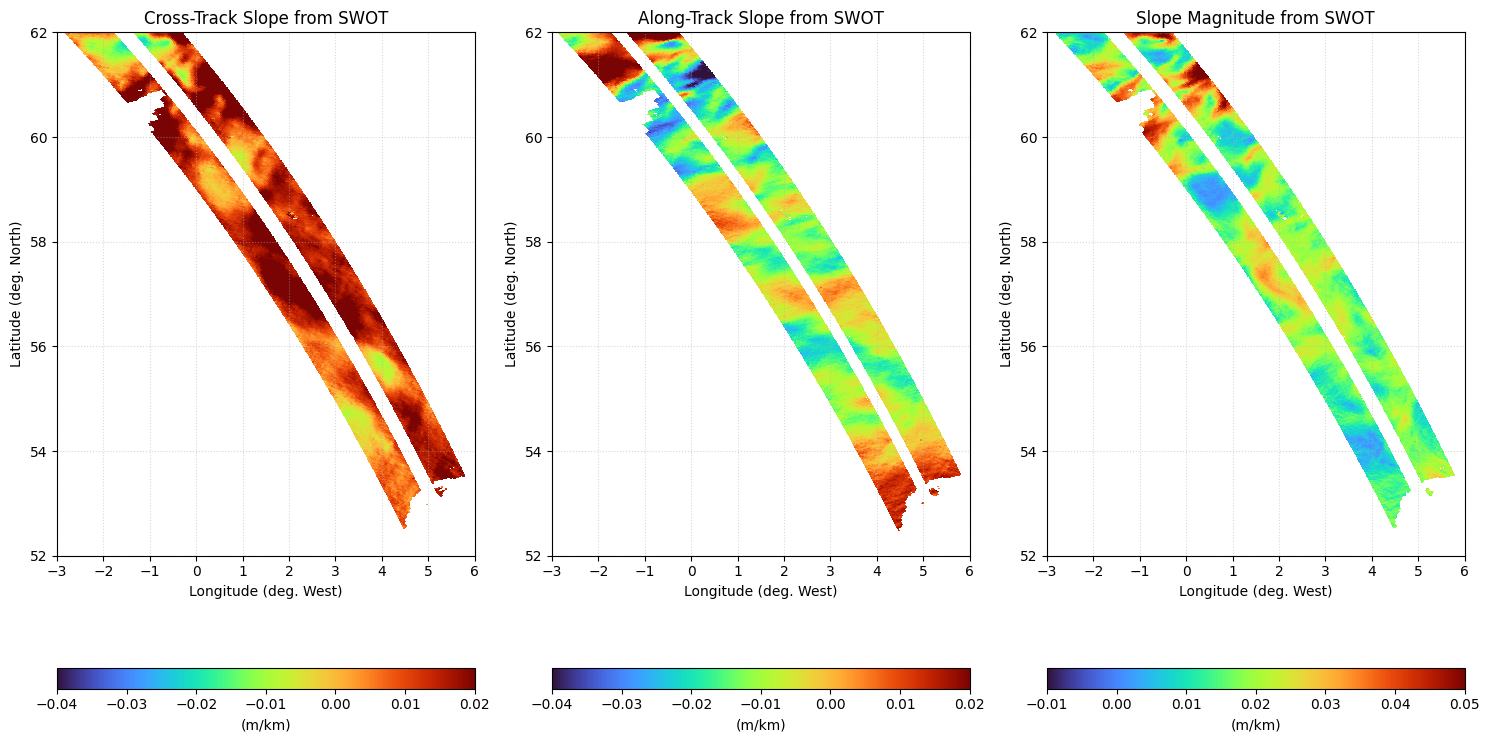

In [59]:


# We now plot the data to see the results

fig, ax = plt.subplots(1,3,figsize=(15,8))
ax_nb = 0
sc=ax[ax_nb].pcolormesh(lon, lat, slope_crosstrack, cmap="turbo",
                         vmin=-0.04,vmax=0.02
                        )
# ax[ax_nb].set_aspect(1);
plt.colorbar(sc, orientation="horizontal", label="(m/km)")
ax[ax_nb].set_title("Cross-Track Slope from SWOT"); ax[ax_nb].grid(which="both", alpha=0.5, linestyle=":")
ax[ax_nb].set_xlabel("Longitude (deg. West)"); ax[ax_nb].set_ylabel("Latitude (deg. North)")
ax[ax_nb].set_ylim(52,62)
ax[ax_nb].set_xlim(-3,6)


ax_nb = 1
sc=ax[ax_nb].pcolormesh(lon, lat, slope_alongtrack, cmap="turbo",vmin=-0.04,vmax=0.02)
# ax[ax_nb].set_aspect(1);
plt.colorbar(sc, orientation="horizontal", label="(m/km)")
ax[ax_nb].set_title("Along-Track Slope from SWOT"); ax[ax_nb].grid(which="both", alpha=0.5, linestyle=":")
ax[ax_nb].set_xlabel("Longitude (deg. West)"); ax[ax_nb].set_ylabel("Latitude (deg. North)")
ax[ax_nb].set_ylim(52,62)
ax[ax_nb].set_xlim(-3,6)


ax_nb = 2
sc=ax[ax_nb].pcolormesh(lon, lat,slope_magnitude, cmap="turbo",vmin=-0.01,vmax=0.05)
# ax[ax_nb].set_aspect(1);
plt.colorbar(sc, orientation="horizontal", label="(m/km)")
ax[ax_nb].set_title("Slope Magnitude from SWOT"); ax[ax_nb].grid(which="both", alpha=0.5, linestyle=":")
ax[ax_nb].set_xlabel("Longitude (deg. West)"); ax[ax_nb].set_ylabel("Latitude (deg. North)")
ax[ax_nb].set_ylim(52,62)
ax[ax_nb].set_xlim(-3,6)


plt.tight_layout()
plt.show()

c. Our data is aligned on the along- and cross-track directions, and not on cartesian coordinates. Based on the orbital inclination of SWOT, which is 78 degrees, we can estimate a rough orbital angle theta (theta = 180 – (90-swotinclination)). Using a [rotation matrix](https://en.wikipedia.org/wiki/Rotation_matrix), we can then rotate the slopes from the along and cross-track directions to north-east directions.

Compute the orbital angle θ, and convert the Along-Track and Cross-Track slopes into North-South and East-West slopes and plot. What changed?

In [60]:
# To rotate the system we define the rotation matrix
def R(theta):
    # For the definition see: https://en.wikipedia.org/wiki/Rotation_matrix
    return np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])

# We have to determine the orbit angle theta
# A rough way is to know the inclination of SWOT is about 78 degrees:
theta = 180 - (90-78)
# But this is not entirely accurate.

# If we think about the cross-track and along-track slopes as a vector, we can gather all the SWOT observations into a 2xN matrix
# We use .reshape(-1) in order to reformat the 2D SWOT matrix into two columns and put them side by side
slopes_vector = np.c_[slope_alongtrack.reshape(-1), slope_crosstrack.reshape(-1)].T

# We next use matrix multiplication (by @ in python):
slopes_ne = R(np.deg2rad(theta)) @ slopes_vector
# We now have the slopes in a north-east direction, contained in the 2xN matrix
# We dont bother calculating the magnitude, as this is not changed by rotating the coordinate system


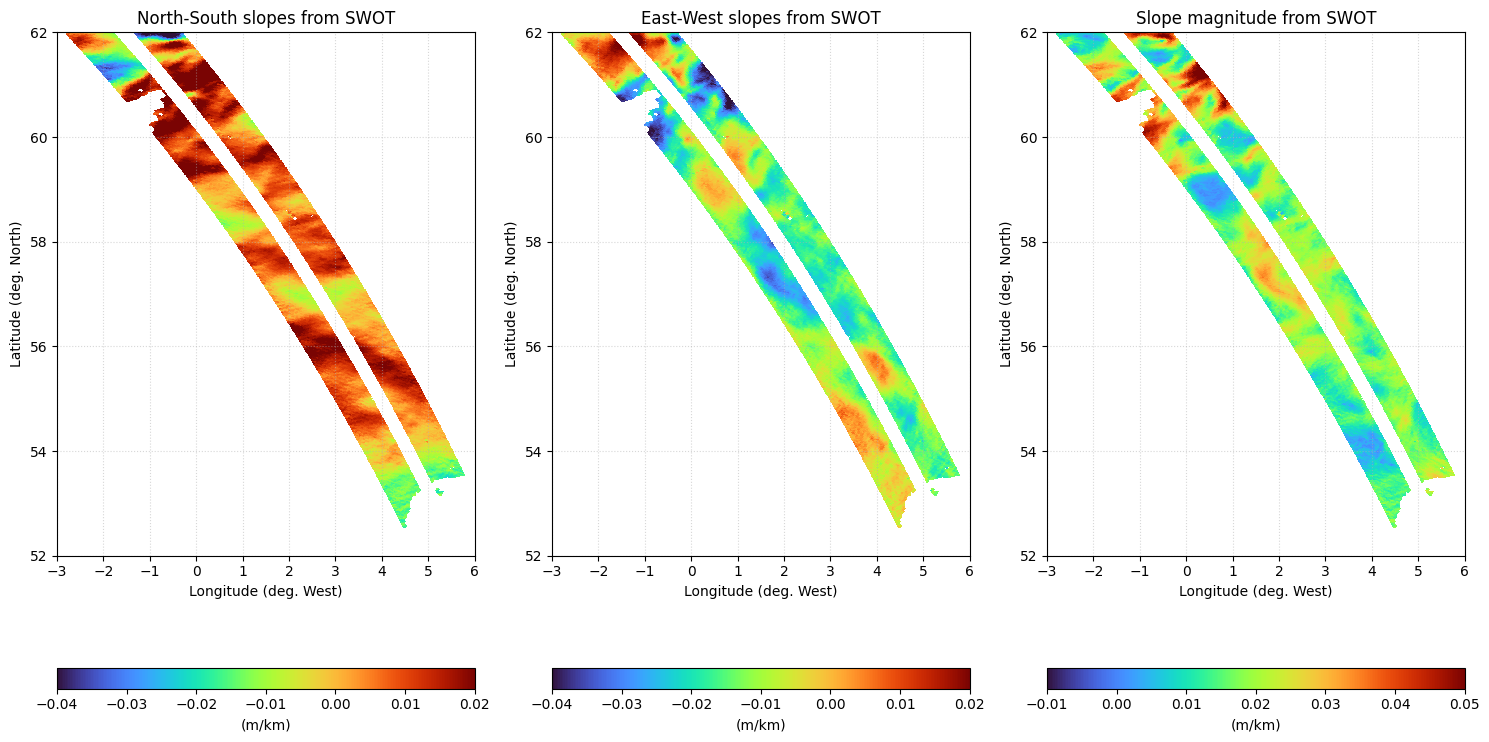

In [61]:
# We plot the results like before
fig, ax = plt.subplots(1,3,figsize=(15,8))

ax_nb = 0
sc=ax[ax_nb].pcolormesh(lon,lat, slopes_ne[0,:].reshape(ssh.shape), cmap="turbo",vmin=-0.04,vmax=0.02)
# ax[ax_nb].set_aspect(1);
plt.colorbar(sc, orientation="horizontal", label="(m/km)")
ax[ax_nb].set_title("North-South slopes from SWOT"); ax[ax_nb].grid(which="both", alpha=0.5, linestyle=":")
ax[ax_nb].set_xlabel("Longitude (deg. West)"); ax[ax_nb].set_ylabel("Latitude (deg. North)")
ax[ax_nb].set_ylim(52,62)
ax[ax_nb].set_xlim(-3,6)


ax_nb = 1
sc=ax[ax_nb].pcolormesh(lon,lat, slopes_ne[1,:].reshape(ssh.shape), cmap="turbo",vmin=-0.04,vmax=0.02)
# ax[ax_nb].set_aspect(1);
plt.colorbar(sc, orientation="horizontal", label="(m/km)")
ax[ax_nb].set_title("East-West slopes from SWOT"); ax[ax_nb].grid(which="both", alpha=0.5, linestyle=":")
ax[ax_nb].set_xlabel("Longitude (deg. West)"); ax[ax_nb].set_ylabel("Latitude (deg. North)")
ax[ax_nb].set_ylim(52,62)
ax[ax_nb].set_xlim(-3,6)


ax_nb = 2
sc=ax[ax_nb].pcolormesh(lon,lat, slope_magnitude, cmap="turbo",vmin=-0.01,vmax=0.05)
# ax[ax_nb].set_aspect(1);
plt.colorbar(sc, orientation="horizontal", label="(m/km)")
ax[ax_nb].set_title("Slope magnitude from SWOT"); ax[ax_nb].grid(which="both", alpha=0.5, linestyle=":")
ax[ax_nb].set_xlabel("Longitude (deg. West)"); ax[ax_nb].set_ylabel("Latitude (deg. North)")
ax[ax_nb].set_ylim(52,62)
ax[ax_nb].set_xlim(-3,6)


plt.tight_layout()
plt.show()

d. Compute the slopes now based on the ADT (remember to convert it to N-E direction).

In [41]:
# We compute the slopes on the ADT as we computed in the previous question
adt = np.array(da.adt)

# Compute the slopes
slope_alongtrack, slope_crosstrack = np.gradient(adt)
slope_alongtrack = slope_alongtrack / 2000 # OBS: Be aware of the units! Before we were happy with m/km, but now we need m/m!
slope_crosstrack = slope_crosstrack / 2000 # OBS: Be aware of the units! Before we were happy with m/km, but now we need m/m!
slope_magnitude = np.sqrt((slope_alongtrack)**2 + (slope_crosstrack)**2)

# Convert to N-E
slopes_vector = np.c_[slope_alongtrack.reshape(-1), slope_crosstrack.reshape(-1)].T
slopes_ne = R(np.deg2rad(theta)) @ slopes_vector

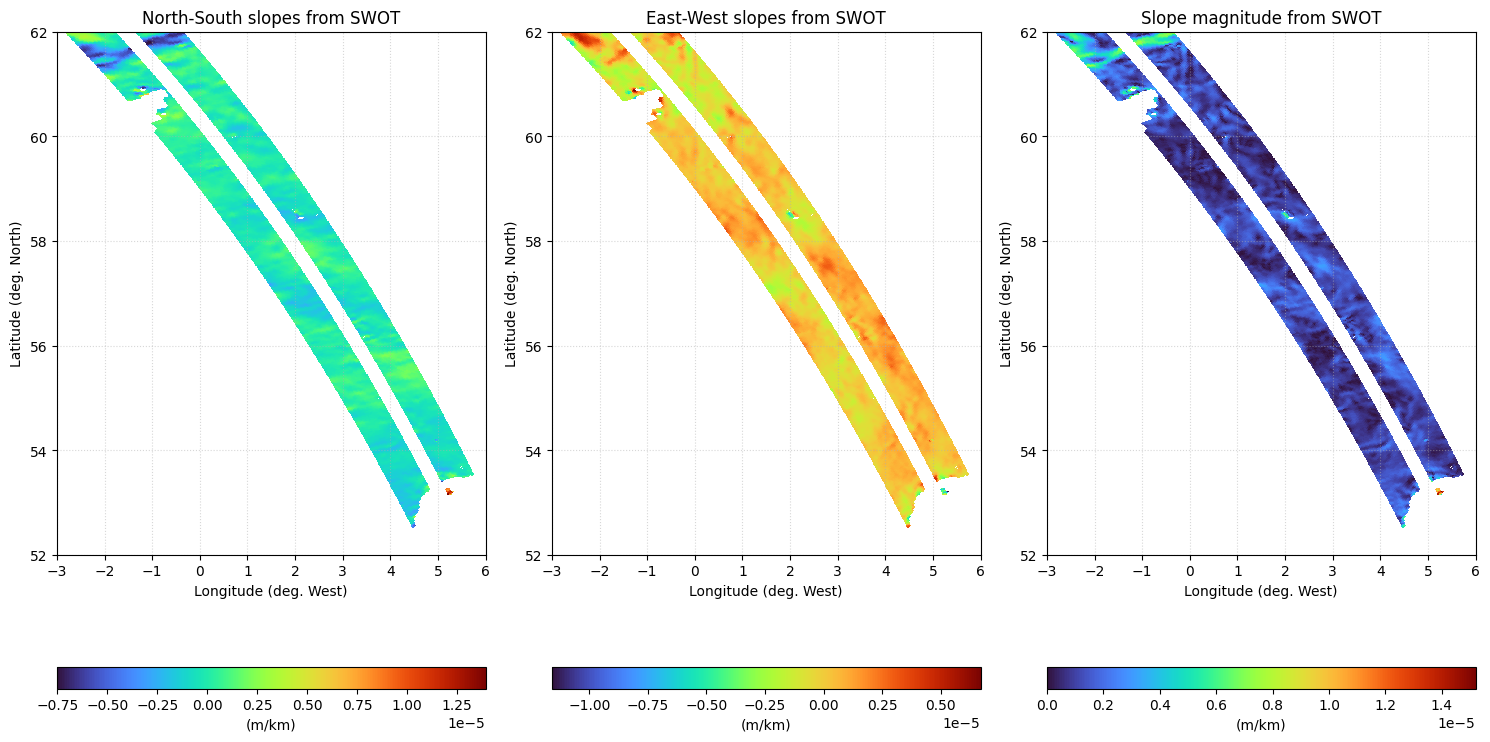

In [42]:
# We plot the results like before
fig, ax = plt.subplots(1,3,figsize=(15,8))

ax_nb = 0
sc=ax[ax_nb].pcolormesh(lon,lat, slopes_ne[0,:].reshape(ssh.shape), cmap="turbo")
# ax[ax_nb].set_aspect(1);
plt.colorbar(sc, orientation="horizontal", label="(m/km)")
ax[ax_nb].set_title("North-South slopes from SWOT"); ax[ax_nb].grid(which="both", alpha=0.5, linestyle=":")
ax[ax_nb].set_xlabel("Longitude (deg. West)"); ax[ax_nb].set_ylabel("Latitude (deg. North)")
ax[ax_nb].set_ylim(52,62)
ax[ax_nb].set_xlim(-3,6)


ax_nb = 1
sc=ax[ax_nb].pcolormesh(lon,lat, slopes_ne[1,:].reshape(ssh.shape), cmap="turbo")
# ax[ax_nb].set_aspect(1);
plt.colorbar(sc, orientation="horizontal", label="(m/km)")
ax[ax_nb].set_title("East-West slopes from SWOT"); ax[ax_nb].grid(which="both", alpha=0.5, linestyle=":")
ax[ax_nb].set_xlabel("Longitude (deg. West)"); ax[ax_nb].set_ylabel("Latitude (deg. North)")
ax[ax_nb].set_ylim(52,62)
ax[ax_nb].set_xlim(-3,6)


ax_nb = 2
sc=ax[ax_nb].pcolormesh(lon,lat, slope_magnitude, cmap="turbo")
# ax[ax_nb].set_aspect(1);
plt.colorbar(sc, orientation="horizontal", label="(m/km)")
ax[ax_nb].set_title("Slope magnitude from SWOT"); ax[ax_nb].grid(which="both", alpha=0.5, linestyle=":")
ax[ax_nb].set_xlabel("Longitude (deg. West)"); ax[ax_nb].set_ylabel("Latitude (deg. North)")
ax[ax_nb].set_ylim(52,62)
ax[ax_nb].set_xlim(-3,6)


plt.tight_layout()
plt.show()

e. Compute the Coriolis parameter

Mean f: 0.0001191717455364038


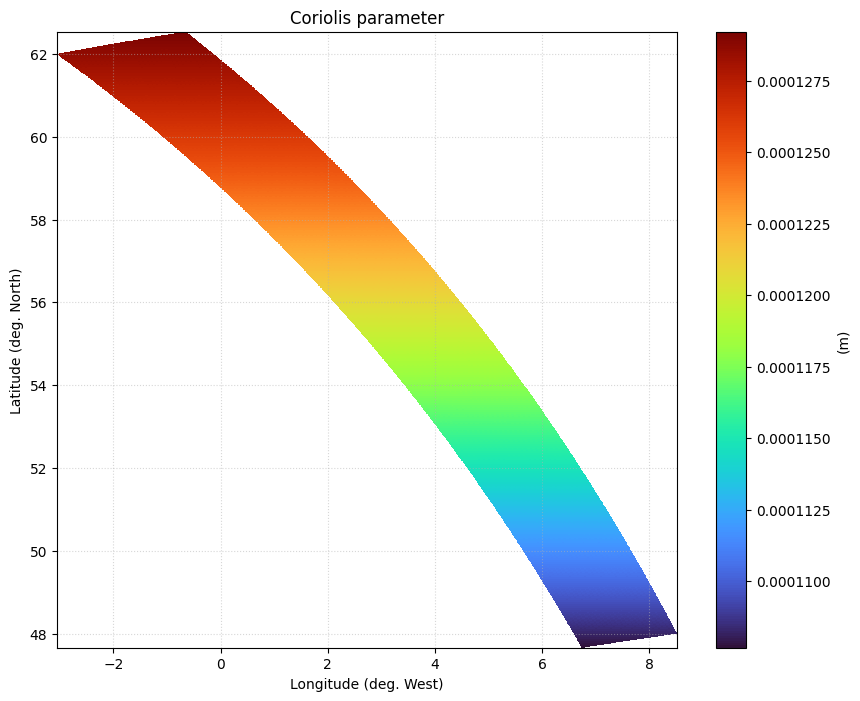

In [43]:

# We compute the coriolis parameter

# Defining the constants
g = 9.82
Omega = 7.282*1e-5

# Compute the coriolis parameter
f = 2*Omega*np.sin(np.deg2rad(np.array(da['latitude'])))

print("Mean f:",f.mean())
fig, ax = plt.subplots(figsize=(10,8))
sc=ax.pcolormesh(lon,lat, f, cmap="turbo")
# ax.set_aspect(1);
plt.colorbar(sc, orientation="vertical", label="(m)")
ax.set_title("Coriolis parameter"); ax.grid(which="both", alpha=0.5, linestyle=":")
ax.set_xlabel("Longitude (deg. West)"); ax.set_ylabel("Latitude (deg. North)")
plt.show()

f. Now you have all the ingredients to compute geostrophic currents. Compute geostrophic currents u, v, magnitude and plot it

In [44]:
# Now we compute the geostrophic currents from the equations
u = - g/f * slopes_ne[0,:].reshape(ssh.shape)
v = g/f * slopes_ne[1,:].reshape(ssh.shape)
uv = np.sqrt(u**2 + v**2)


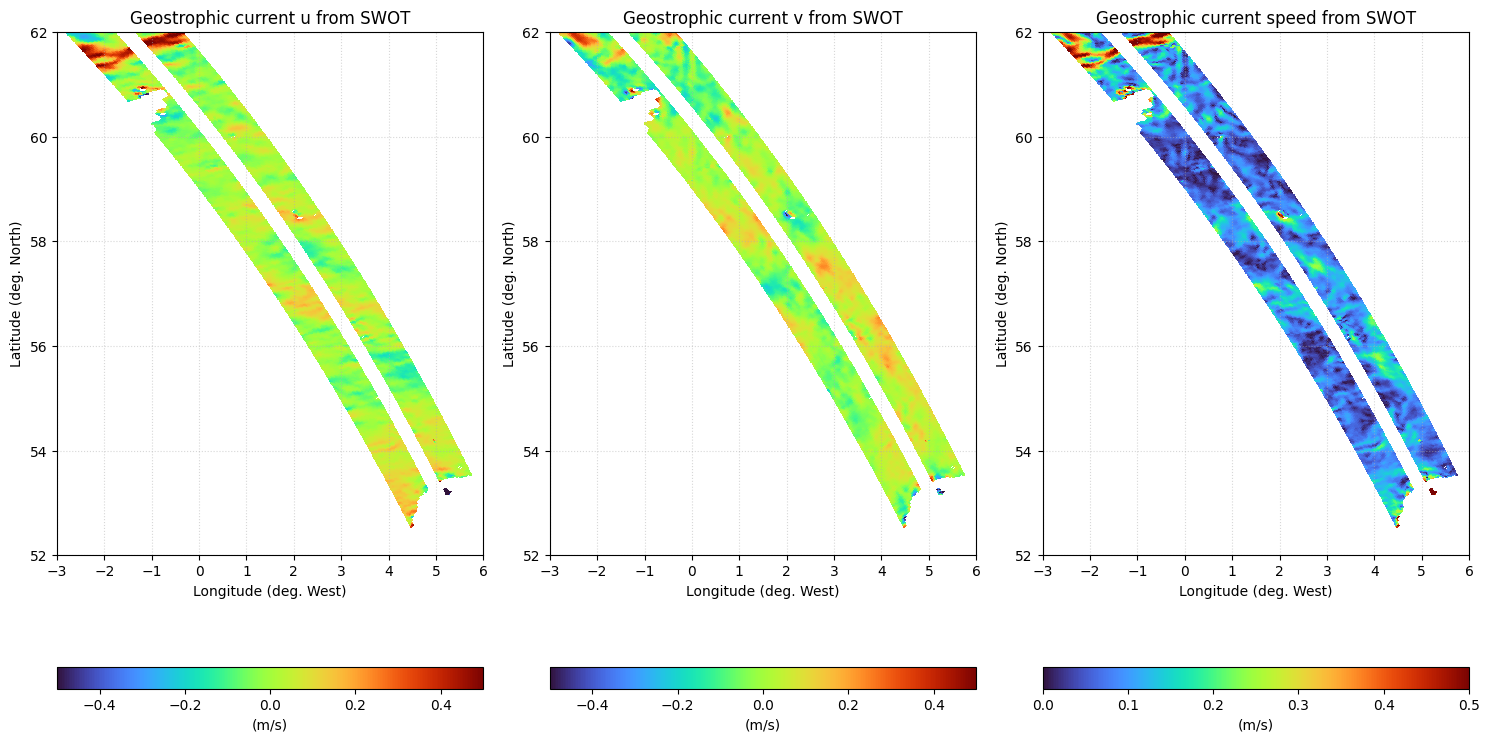

In [45]:
# Plot the data
fig, ax = plt.subplots(1,3,figsize=(15,8))
ax_nb = 0
# ax[ax_nb].imshow(bathymetry["depth"], origin="lower", extent=bathymetry["extent"], cmap="Blues_r")
sc=ax[ax_nb].pcolormesh(lon,lat, u, cmap="turbo", vmin=-0.5, vmax=0.5)
# ax[ax_nb].set_aspect(1);
plt.colorbar(sc, orientation="horizontal", label="(m/s)")
ax[ax_nb].set_title("Geostrophic current u from SWOT"); ax[ax_nb].grid(which="both", alpha=0.5, linestyle=":")
ax[ax_nb].set_xlabel("Longitude (deg. West)"); ax[ax_nb].set_ylabel("Latitude (deg. North)")
ax[ax_nb].set_ylim(52,62)
ax[ax_nb].set_xlim(-3,6)


ax_nb = 1
# ax[ax_nb].imshow(bathymetry["depth"], origin="lower", extent=bathymetry["extent"], cmap="Blues_r")
sc=ax[ax_nb].pcolormesh(lon,lat, v, cmap="turbo", vmin=-0.5, vmax=0.5)
# ax[ax_nb].set_aspect(1);
plt.colorbar(sc, orientation="horizontal", label="(m/s)")
ax[ax_nb].set_title("Geostrophic current v from SWOT"); ax[ax_nb].grid(which="both", alpha=0.5, linestyle=":")
ax[ax_nb].set_xlabel("Longitude (deg. West)"); ax[ax_nb].set_ylabel("Latitude (deg. North)")
ax[ax_nb].set_ylim(52,62)
ax[ax_nb].set_xlim(-3,6)


ax_nb = 2
# ax[ax_nb].imshow(bathymetry["depth"], origin="lower", extent=bathymetry["extent"], cmap="Blues_r")
sc=ax[ax_nb].pcolormesh(lon,lat, uv, cmap="turbo", vmin=0, vmax=0.5)
# ax[ax_nb].set_aspect(1);
plt.colorbar(sc, orientation="horizontal", label="(m/s)")
ax[ax_nb].set_title("Geostrophic current speed from SWOT"); ax[ax_nb].grid(which="both", alpha=0.5, linestyle=":")
ax[ax_nb].set_xlabel("Longitude (deg. West)"); ax[ax_nb].set_ylabel("Latitude (deg. North)")
ax[ax_nb].set_ylim(52,62)
ax[ax_nb].set_xlim(-3,6)


plt.tight_layout()
plt.show()

g. Compare the velocities we computed with the ones provided in the dataset already. Look at both the velocities computed with the filtered and unfiltered SSHA.  
Note that, while they can be used to check if your computation is correct, it might not be exactly identitical due to a different noise filter that has been applied.


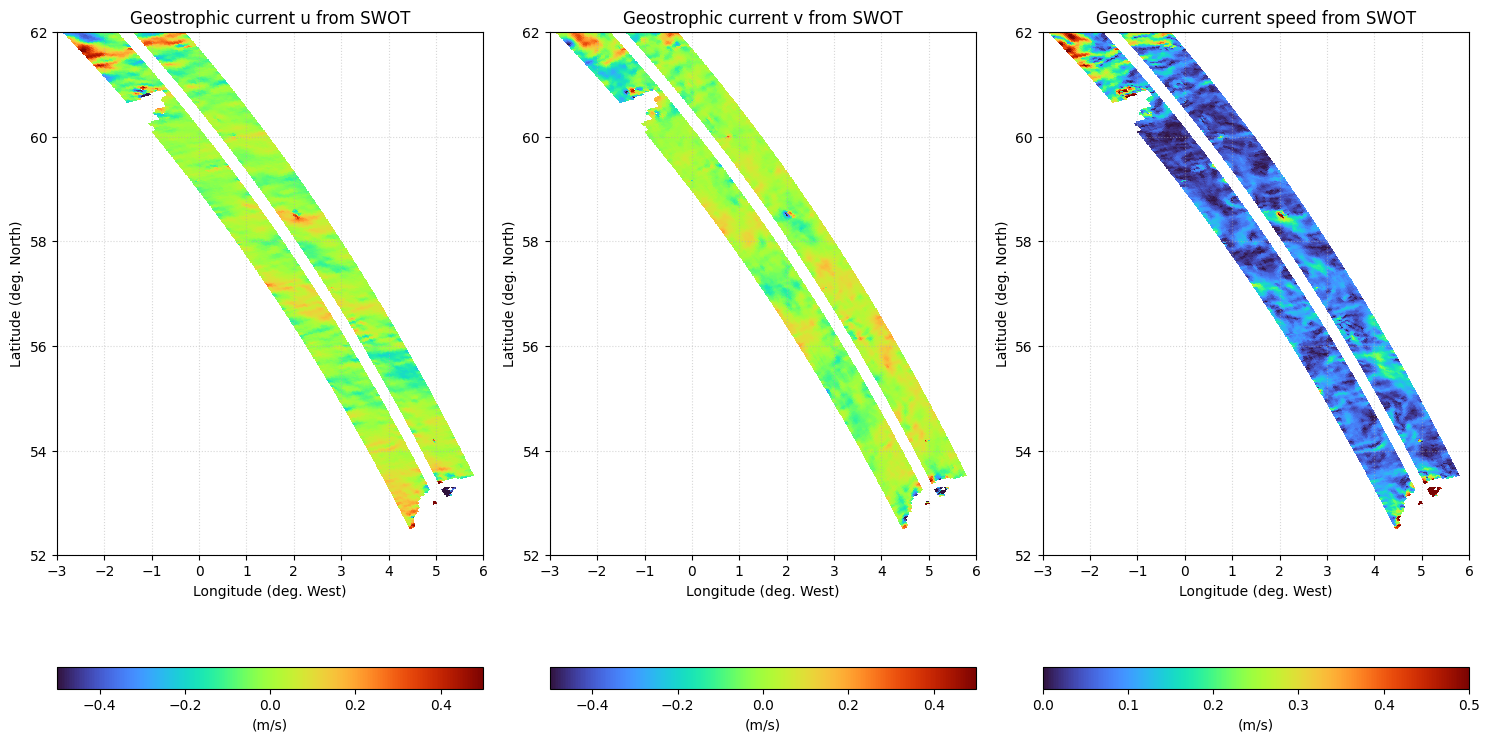

In [46]:
u2 = np.array(da['ugosa_filtered'])
v2 = np.array(da['vgosa_filtered'])
uv2 = np.sqrt(u2**2 + v2**2)

# Plot the data
fig, ax = plt.subplots(1,3,figsize=(15,8))
ax_nb = 0
# ax[ax_nb].imshow(bathymetry["depth"], origin="lower", extent=bathymetry["extent"], cmap="Blues_r")
sc=ax[ax_nb].pcolormesh(lon,lat, u2, cmap="turbo", vmin=-0.5, vmax=0.5)
# ax[ax_nb].set_aspect(1);
plt.colorbar(sc, orientation="horizontal", label="(m/s)")
ax[ax_nb].set_title("Geostrophic current u from SWOT"); ax[ax_nb].grid(which="both", alpha=0.5, linestyle=":")
ax[ax_nb].set_xlabel("Longitude (deg. West)"); ax[ax_nb].set_ylabel("Latitude (deg. North)")
ax[ax_nb].set_ylim(52,62)
ax[ax_nb].set_xlim(-3,6)


ax_nb = 1
# ax[ax_nb].imshow(bathymetry["depth"], origin="lower", extent=bathymetry["extent"], cmap="Blues_r")
sc=ax[ax_nb].pcolormesh(lon,lat, v2, cmap="turbo", vmin=-0.5, vmax=0.5)
# ax[ax_nb].set_aspect(1);
plt.colorbar(sc, orientation="horizontal", label="(m/s)")
ax[ax_nb].set_title("Geostrophic current v from SWOT"); ax[ax_nb].grid(which="both", alpha=0.5, linestyle=":")
ax[ax_nb].set_xlabel("Longitude (deg. West)"); ax[ax_nb].set_ylabel("Latitude (deg. North)")
ax[ax_nb].set_ylim(52,62)
ax[ax_nb].set_xlim(-3,6)


ax_nb = 2
# ax[ax_nb].imshow(bathymetry["depth"], origin="lower", extent=bathymetry["extent"], cmap="Blues_r")
sc=ax[ax_nb].pcolormesh(lon,lat, uv2, cmap="turbo", vmin=0, vmax=0.5)
# ax[ax_nb].set_aspect(1);
plt.colorbar(sc, orientation="horizontal", label="(m/s)")
ax[ax_nb].set_title("Geostrophic current speed from SWOT"); ax[ax_nb].grid(which="both", alpha=0.5, linestyle=":")
ax[ax_nb].set_xlabel("Longitude (deg. West)"); ax[ax_nb].set_ylabel("Latitude (deg. North)")
ax[ax_nb].set_ylim(52,62)
ax[ax_nb].set_xlim(-3,6)


plt.tight_layout()
plt.show()

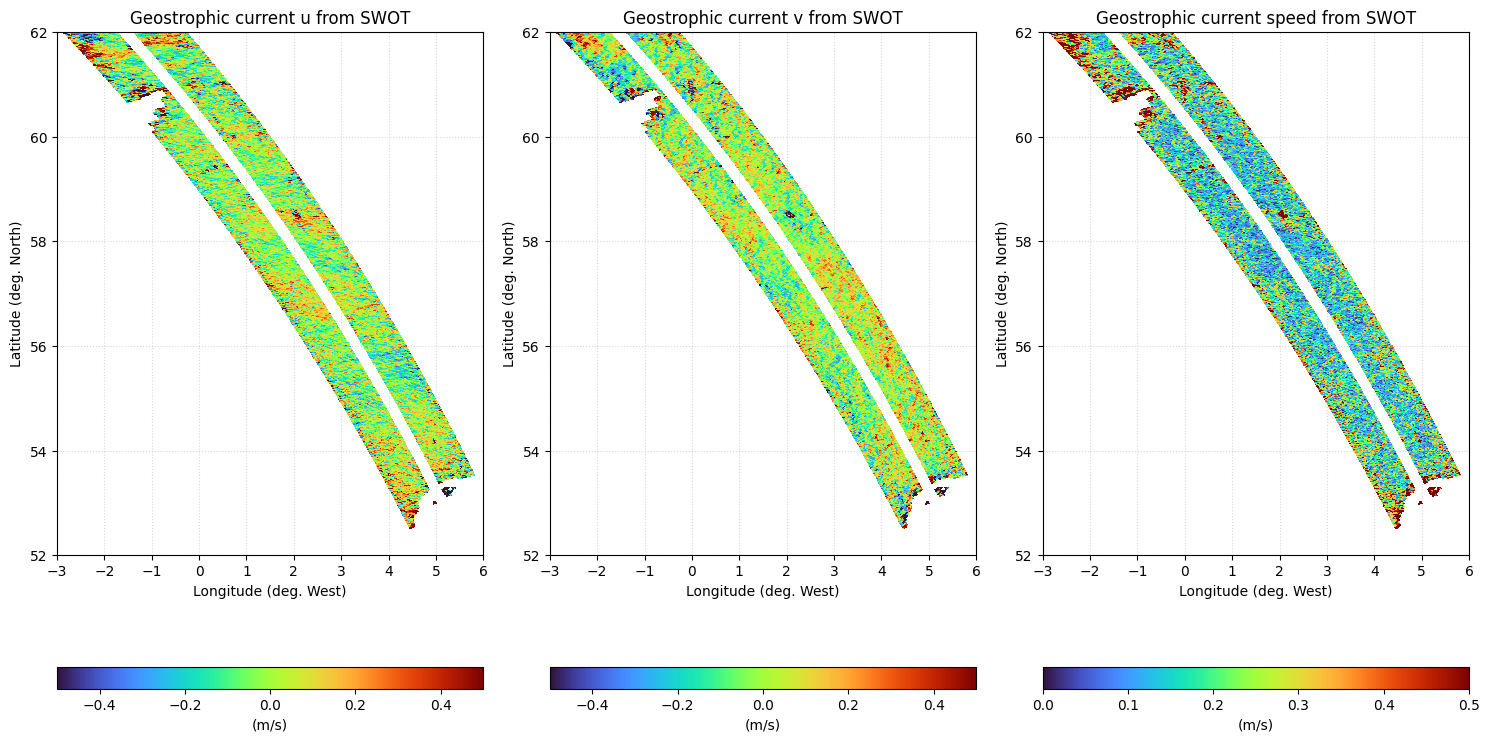

In [47]:
u2 = np.array(da['ugosa_unfiltered'])
v2 = np.array(da['vgosa_unfiltered'])
uv2 = np.sqrt(u2**2 + v2**2)

# Plot the data
fig, ax = plt.subplots(1,3,figsize=(15,8))
ax_nb = 0
# ax[ax_nb].imshow(bathymetry["depth"], origin="lower", extent=bathymetry["extent"], cmap="Blues_r")
sc=ax[ax_nb].pcolormesh(lon,lat, u2, cmap="turbo", vmin=-0.5, vmax=0.5)
# ax[ax_nb].set_aspect(1);
plt.colorbar(sc, orientation="horizontal", label="(m/s)")
ax[ax_nb].set_title("Geostrophic current u from SWOT"); ax[ax_nb].grid(which="both", alpha=0.5, linestyle=":")
ax[ax_nb].set_xlabel("Longitude (deg. West)"); ax[ax_nb].set_ylabel("Latitude (deg. North)")
ax[ax_nb].set_ylim(52,62)
ax[ax_nb].set_xlim(-3,6)

ax_nb = 1
# ax[ax_nb].imshow(bathymetry["depth"], origin="lower", extent=bathymetry["extent"], cmap="Blues_r")
sc=ax[ax_nb].pcolormesh(lon,lat, v2, cmap="turbo", vmin=-0.5, vmax=0.5)
# ax[ax_nb].set_aspect(1);
plt.colorbar(sc, orientation="horizontal", label="(m/s)")
ax[ax_nb].set_title("Geostrophic current v from SWOT"); ax[ax_nb].grid(which="both", alpha=0.5, linestyle=":")
ax[ax_nb].set_xlabel("Longitude (deg. West)"); ax[ax_nb].set_ylabel("Latitude (deg. North)")
ax[ax_nb].set_ylim(52,62)
ax[ax_nb].set_xlim(-3,6)

ax_nb = 2
# ax[ax_nb].imshow(bathymetry["depth"], origin="lower", extent=bathymetry["extent"], cmap="Blues_r")
sc=ax[ax_nb].pcolormesh(lon,lat, uv2, cmap="turbo", vmin=0, vmax=0.5)
# ax[ax_nb].set_aspect(1);
plt.colorbar(sc, orientation="horizontal", label="(m/s)")
ax[ax_nb].set_title("Geostrophic current speed from SWOT"); ax[ax_nb].grid(which="both", alpha=0.5, linestyle=":")
ax[ax_nb].set_xlabel("Longitude (deg. West)"); ax[ax_nb].set_ylabel("Latitude (deg. North)")
ax[ax_nb].set_ylim(52,62)
ax[ax_nb].set_xlim(-3,6)
plt.tight_layout()
plt.show()

# 5. Added value of SWOT
In this last exercise, we will compare SWOT with L4 Altimetry, Tide Gauges and SST

Note, for this part you need to have a marine copernicus user. You can register, for free, here: https://data.marine.copernicus.eu/register



a. Up to now we have been working with only a single cycle. Open one year of SWOT data, which has been provided to you.

In [48]:
def drop_large_vars(ds):
    to_drop = [v for v in ['i_num_line', 'i_num_pixel'] if v in ds]
    return ds.drop_vars(to_drop)

In [49]:
# select one year of data that coincides with the TG data
files2 = ['SWOT_L3_LR_SSH_Expert_001_236_20230729T150350_20230729T155516_v2.0.1.nc',
 'SWOT_L3_LR_SSH_Expert_002_236_20230819T114856_20230819T124022_v2.0.1.nc',
 'SWOT_L3_LR_SSH_Expert_003_236_20230909T083402_20230909T092528_v2.0.1.nc',
 'SWOT_L3_LR_SSH_Expert_004_236_20230930T051905_20230930T061031_v2.0.1.nc',
 'SWOT_L3_LR_SSH_Expert_005_236_20231021T020409_20231021T025535_v2.0.1.nc',
 'SWOT_L3_LR_SSH_Expert_006_236_20231110T224914_20231110T234040_v2.0.1.nc',
 'SWOT_L3_LR_SSH_Expert_007_236_20231201T193420_20231201T202546_v2.0.1.nc',
 'SWOT_L3_LR_SSH_Expert_008_236_20231222T161924_20231222T171050_v2.0.1.nc',
 'SWOT_L3_LR_SSH_Expert_009_236_20240112T130429_20240112T135555_v2.0.1.nc',
 'SWOT_L3_LR_SSH_Expert_010_236_20240202T094935_20240202T104102_v2.0.1.nc',
 'SWOT_L3_LR_SSH_Expert_011_236_20240223T063441_20240223T072607_v2.0.1.nc',
#  'SWOT_L3_LR_SSH_Expert_012_236_20240315T031943_20240315T041109_v2.0.1.nc',
 'SWOT_L3_LR_SSH_Expert_013_236_20240405T000447_20240405T005613_v2.0.1.nc',
 'SWOT_L3_LR_SSH_Expert_014_236_20240425T204953_20240425T214120_v2.0.1.nc',
 'SWOT_L3_LR_SSH_Expert_015_236_20240516T173458_20240516T182624_v2.0.1.nc',
 'SWOT_L3_LR_SSH_Expert_016_236_20240606T142004_20240606T151130_v2.0.1.nc',
 'SWOT_L3_LR_SSH_Expert_017_236_20240627T110507_20240627T115633_v2.0.1.nc',]
len(files2)
files_to_open = [path+file for file in files2]
files_to_open
dm = xr.open_mfdataset(files_to_open,concat_dim='cycle',combine='nested',
    preprocess=drop_large_vars)

In [50]:
# get the first and last dates

# Flatten and drop NaT values
valid_times = dm['time'].values.flatten()
valid_times = valid_times[~pd.isnull(valid_times)]

# Select first valid time and format
date_start = pd.to_datetime(valid_times[0]).strftime('%Y-%m-%d')
date_end = pd.to_datetime(valid_times[-1]).strftime('%Y-%m-%d')
print(date_start)
print(date_end)

2023-07-29
2024-06-27


b. From CMEMS, load 1 year of L4 gridded all-sat altimetry product.

In [51]:
# login to copernicus
from copernicusmarine import login
# login(username="your_username", password="your_password")
# you can either define your login here, or it will ask you to fill in below.

In [52]:
# Load xarray dataset
duacs_l4 = copernicusmarine.open_dataset(
  dataset_id = "cmems_obs-sl_glo_phy-ssh_nrt_allsat-l4-duacs-0.25deg_P1D",
  start_datetime=date_start,
  end_datetime=date_end,
  # start_datetime='2023-08-28',
  # end_datetime='2023-08-30',

  minimum_longitude = lon_range[0],
  maximum_longitude = lon_range[1],
  minimum_latitude = lat_range[0],
  maximum_latitude = lat_range[1],
  variables = ['sla']
)

INFO - 2025-07-10T18:25:46Z - Selected dataset version: "202311"
INFO:copernicusmarine:Selected dataset version: "202311"
INFO - 2025-07-10T18:25:46Z - Selected dataset part: "default"
INFO:copernicusmarine:Selected dataset part: "default"


MinimumLongitudeGreaterThanMaximumLongitude: --minimum-longitude option must be smaller or equal to --maximum-longitude

c. Compare SWOT data with gridded L4 altimetry data. Which features can be seen with SWOT that couldn't be detected in the L4 conventional altimetry?

In [ ]:
plot_kwargs = dict(
    x="longitude",
    y="latitude",
    cmap="Spectral_r",
    vmin=0,
    vmax=0.3
)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(21, 15), subplot_kw=dict(projection=ccrs.PlateCarree()))

dx = duacs_l4.sla.sel(time=np.datetime64(date_start), method='nearest')
dx.plot.pcolormesh(
    ax=ax1,
    alpha=0.7,
    add_colorbar=False,
    **plot_kwargs)
dm['ssha_filtered'][0,:,:].plot.pcolormesh(
    ax=ax1,
    cbar_kwargs={"shrink": 0.2},
    **plot_kwargs)
ax1.set_title(f'Swot SLA with CMEMS SLA {date_start}')
ax1.set_extent(localbox)

dx = duacs_l4.sla.sel(time=np.datetime64(date_end), method='nearest')
dx.plot.pcolormesh(
    ax=ax2,
    alpha=0.7,
    add_colorbar=False,
    **plot_kwargs)
dm['ssha_filtered'][-1,:,:].plot.pcolormesh(
    ax=ax2,
    cbar_kwargs={"shrink": 0.2},
    # vmin=0,vmax=0.3,
    **plot_kwargs)
ax2.set_title(f'Swot SLA with CMEMS SLA {date_end}')
ax2.set_extent(localbox)
for ax in [ax1, ax2]:
    ax.coastlines()
    gls = ax.gridlines(draw_labels=True)
    gls.top_labels=False
    gls.right_labels=False


d. Load time series from 3 tide gauges in the Dutch Wadden Sea available here: https://drive.google.com/file/d/1cdoe_j6XB4CIM3KoN0txvrRL0XZfkeMR/view?usp=sharin

This data was downloaded from CMEMS: https://data.marine.copernicus.eu/product/INSITU_GLO_PHY_SSH_DISCRETE_MY_013_053/services

After downloading, I combined the three tide gauges into a single netcdf, for simplicity.

In [ ]:
# open TG
filename = 'wadden_sea_TGs.nc'
if USING_COLAB:
    tg_url = 'https://drive.google.com/file/d/1cdoe_j6XB4CIM3KoN0txvrRL0XZfkeMR/view?usp=sharing'
    file_id = tg_url.split('/')[5]
    gdown.download(f"https://drive.google.com/uc?id={file_id}", quiet=True)
    path = '/content/'
    dtg = xr.open_dataset(path+filename)
else:
    path = '/Users/carocamargo/Documents/data/sealevel/'
    dtg = xr.open_dataset(path+filename)

In [ ]:
dtg

e. Now, compare SWOT data both with the tide gauge data and with L4 altimetry product. For this tou will need to math the time series both in space and in time.

In [ ]:
# zoom-in in the wadden sea
localbox_zoom2 = [3.5,6,52,54]

Plot maps:

In [ ]:
plot_kwargs = dict(
    x="longitude",
    y="latitude",
    cmap="Spectral_r",
    vmin=-0.5,
    vmax=0.5
)

fig, axes = plt.subplots(4,4,figsize=(16,16),
                       subplot_kw=dict(projection=ccrs.PlateCarree()))
for i,cycle in enumerate(dm.cycle):
  ax = axes[i//4,i%4]
  # get the time of the start of the pass
  date = pd.to_datetime(dm['time'][cycle,:].values.min()).strftime('%Y-%m-%d')
  dt_swot = np.datetime64(date)

  # identify L4 closest to it
  dx = duacs_l4.sla.sel(time=np.datetime64(date), method='nearest')

  #identify the time of the TG closest to it
  idx_time = np.argmin(np.abs(dtg['time'].values - dt_swot))
  # Extract TG SL at that time
  sl = dtg['SL'].isel(time=idx_time).values


  # plot L4
  dx.plot.pcolormesh(
      ax=ax,
      alpha=0.7,
      add_colorbar=False,
      **plot_kwargs)
  # plot SWOT
  dm['ssha_unedited'][cycle,:,:].plot.pcolormesh(
      ax=ax,
      alpha=0.7,
      add_colorbar=False,
      # cbar_kwargs={"shrink": 0.4},
      **plot_kwargs)
  ax.set_title(f'{date}')
  ax.set_extent(localbox_zoom2)
  ax.coastlines()
  gls = ax.gridlines(draw_labels=True)
  gls.top_labels=False
  gls.right_labels=False
  # scatter TG
  sc = ax.scatter(
          dtg['lon'].values, dtg['lat'].values, c=sl,
          cmap=plot_kwargs['cmap'],
          edgecolor='k',
          vmin=plot_kwargs['vmin'],
          vmax=plot_kwargs['vmax'],
          s=80, marker='o', zorder=10,
          transform=ccrs.PlateCarree()
      )

plt.tight_layout()
plt.show()

Plot time series:

In [ ]:
swot_lat = np.array(dm['latitude'])
swot_lon = np.array(dm['longitude'])

l4_lat = np.array(duacs_l4['latitude'])
l4_lon = np.array(duacs_l4['longitude'])
llon,llat = np.meshgrid(l4_lon,l4_lat)
i = 0

tg_lat = np.array(dtg['lat'][i])
tg_lon = np.array(dtg['lon'][i])
tg_sl = np.array(dtg['SL'][:,i])

# Find nearest SWOT point to tide gauge
dists = np.hypot(swot_lat - tg_lat, swot_lon - tg_lon)
idx = np.argmin(dists)
il,ip = np.where(dists==np.min(dists))
swot_sl = np.array(dm['ssha_unedited'][:,il,ip]).flatten()

# Find nearest L4 point to TG
dists = np.hypot(llat - tg_lat, llon - tg_lon)
idx = np.argmin(dists)
ilat,ilon = np.where(dists==np.min(dists))
l4_sl = np.array(duacs_l4['sla'][:,ilat,ilon]).flatten()

# plot
plt.plot(dtg.time,tg_sl,label='TG')
plt.plot(duacs_l4.time,l4_sl,label='L4')
plt.plot(dm.time[:,il],swot_sl,label='SWOT')
plt.legend()
plt.show()

In [ ]:
swot_lat = np.array(dm['latitude'])
swot_lon = np.array(dm['longitude'])

l4_lat = np.array(duacs_l4['latitude'])
l4_lon = np.array(duacs_l4['longitude'])
llon,llat = np.meshgrid(l4_lon,l4_lat)
i = 0
# loop over each tg
for i, station in enumerate(dtg['station']):

  tg_lat = np.array(dtg['lat'][i])
  tg_lon = np.array(dtg['lon'][i])
  tg_sl = np.array(dtg['SL'][:,i])

  # Find nearest SWOT point to tide gauge
  dists = np.hypot(swot_lat - tg_lat, swot_lon - tg_lon)
  idx = np.argmin(dists)
  il,ip = np.where(dists==np.min(dists))
  swot_sl = np.array(dm['ssha_unedited'][:,il,ip]).flatten()

  # Find nearest L4 point to TG
  dists = np.hypot(llat - tg_lat, llon - tg_lon)
  idx = np.argmin(dists)
  ilat,ilon = np.where(dists==np.min(dists))
  if len(ilat)>1:
    ilat=ilat[0]
    ilon=ilon[0]
  # l4_sl = np.array(duacs_l4['sla'][:,ilat,ilon]).flatten()

  # select only time of pass of SWOT
  tg_sl_swot = np.full_like(swot_sl,np.nan)
  l4_sl_swot = np.full_like(swot_sl,np.nan)

  for icycle, cycle in enumerate(np.array(dm.cycle)):
    date = pd.to_datetime(dm['time'][cycle,:].values.min()).strftime('%Y-%m-%d')
    dt_swot = np.datetime64(date)
    #identify the time of the TG closest to it
    idx_time = np.argmin(np.abs(dtg['time'].values - dt_swot))
    tg_sl_swot[icycle] = tg_sl[idx_time]

    # L4
    dx = duacs_l4.sel(time=np.datetime64(date), method='nearest')
    l4_sl_swot[icycle] = dx['sla'][ilat,ilon]

  #
  # plot
  plt.figure(figsize=(10,5))
  time= dm.time[:,il]
  plt.plot(time,tg_sl_swot,label='TG')
  plt.plot(time,l4_sl_swot,label='L4')
  plt.plot(time,swot_sl,label='SWOT')
  plt.title(np.array(dtg['station_name'][i]))
  plt.legend()
  plt.show()

f. Zoom-in in the Mediterranean sea (lat range: 32 to 45; lon range: 0 to 15), and overlay SWOT SSHA with IFREMER sea-surface temperature (SST). Do you see any patterns?


In [ ]:
# focus on the mediterranean
# Mediterranean sea
lat_range = 32, 45
lon_range = 0, 15
medbox = [lon_range[0], lon_range[1], lat_range[0], lat_range[1]]

In [ ]:
dm = subset_ds(dm, lon_range, lat_range)


In [ ]:
# Load xarray dataset
sst = copernicusmarine.open_dataset(
  dataset_id = "IFREMER-GLOB-SST-L3-NRT-OBS_FULL_TIME_SERIE",
  start_datetime=date_start,
  end_datetime=date_end,
  minimum_longitude = lon_range[0],
  maximum_longitude = lon_range[1],
  minimum_latitude = lat_range[0],
  maximum_latitude = lat_range[1],
  variables = ['sea_surface_temperature']
)


In [ ]:
sst['sst_c'] = sst['sea_surface_temperature'] - 273.15
ds_sst = sst.sel(time=np.datetime64(date_start), method='nearest')


In [ ]:
fig, ax = plt.subplots(figsize=(14, 12), subplot_kw=dict(projection=ccrs.PlateCarree()))

plot_kwargs = dict(
    x="longitude",
    y="latitude",
    cmap="Spectral_r"
)

cb_args = dict(
    add_colorbar=True,
    cbar_kwargs={"shrink": 0.3}
)

cmap_sst = cmocean.cm.balance
levs_sst = np.arange(18,30,step=1)
norm_sst = mplcm.colors.BoundaryNorm(levs_sst,cmap_sst.N)

contourf = ax.contourf(ds_sst.longitude,
                      ds_sst.latitude,
                      ds_sst.sea_surface_temperature-273.15,
                      levs_sst,
                      cmap=cmap_sst,
                      norm=norm_sst,
                      alpha=0.7,
                      extend='both')

contour = ax.contour(ds_sst.longitude,
                      ds_sst.latitude,
                      ds_sst.sea_surface_temperature-273.15,
                      levels=levs_sst,
                      colors="black",
                      linewidths=0.3)

ax.clabel(contour, inline=1, fontsize=8)

cax = ax.inset_axes([0.2, -0.1, 0.5, 0.04])

cb_sst = plt.colorbar(contourf, cax=cax, orientation='horizontal', pad=0.005, shrink=0.5)
cb_sst.set_label('sea surface temperature [degree Celsius]')
cb_sst.ax.tick_params(labelsize=10)

dm['ssha_unfiltered'][0,:,:].plot.pcolormesh(
    ax=ax,
    vmin=0,
    vmax=0.3,
    **plot_kwargs,
    **cb_args)

ax.coastlines()
# ax.set_extent(medbox)
gls = ax.gridlines(draw_labels=True)
gls.top_labels=False
gls.right_labels=False
ax.set_title('Swot SLA with SST')

plt.show()